In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import seaborn.objects as so

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

### 1. Data Processing & Visualization

In [3]:
df = pd.read_csv('./data/pedestrian.csv')
df.head()

,Crash Instance,Highway Class,Rural/Urban Area (2016+),Highway Number,Number of Traffic Lanes,Relation to Roadway,Area of Road at Crash,Road Conditions,Speed Limit at Crash Site,Posted Speed Limit,...,Person Race (2021+),Party Type,Person Position,Person Restraint,Person Airbag Deployed,Person Ejection,Person Trapped,Person Age,Crash Report,Map
0,202141,"County Road, City Street, or Unknown",Urban,Local Road or Unknown,3,On the Road,Other Non-Freeway Areas - Straight Roadway (no...,Dry,25,Posted Speed Limit,...,White,Pedestrian,Pedestrian,No Belts Available,Not Equipped,Not Ejected,Not Trapped,DOB Invalid,UD-10,Map
1,2019105,Michigan Route,Urban,M-102/US-102,4,On the Road,Other Non-Freeway Areas - Straight Roadway (no...,Wet,40,Posted Speed Limit,...,Uncoded & Errors,Pedestrian,Pedestrian,No Belts Available,Not Equipped,Not Ejected,Not Trapped,DOB Invalid,UD-10,Map
2,2019332,"County Road, City Street, or Unknown",Urban,Local Road or Unknown,2,On the Road,Other Non-Freeway Areas - Curved Roadway (not ...,Snow,35,Posted Speed Limit,...,Uncoded & Errors,Pedestrian,Pedestrian,No Belts Available,Not Equipped,Not Ejected,Not Trapped,13,UD-10,Map
3,2019371,"County Road, City Street, or Unknown",Urban,Local Road or Unknown,2,On the Road,Intersection Crash - Within Intersection,Wet,30,Posted Speed Limit,...,Uncoded & Errors,Pedestrian,Pedestrian,No Belts Available,Not Equipped,Not Ejected,Not Trapped,24,UD-10,Map
4,2019582,Michigan Route,Rural,M-60/M-60BR,2,On the Road,Intersection Crash - Within Intersection,Dry,25,Not Posted,...,Uncoded & Errors,Pedestrian,Pedestrian,No Belts Available,Not Equipped,Not Ejected,Not Trapped,16,UD-10,Map


In [4]:
df[['Person Degree of Injury']].value_counts()

Person Degree of Injury     
Suspected Minor Injury (B)      2282
Possible Injury (C)             2167
Suspected Serious Injury (A)    1394
No Injury (O)                    821
Fatal Injury (K)                 576
Uncoded & Errors                 284
Name: count, dtype: int64

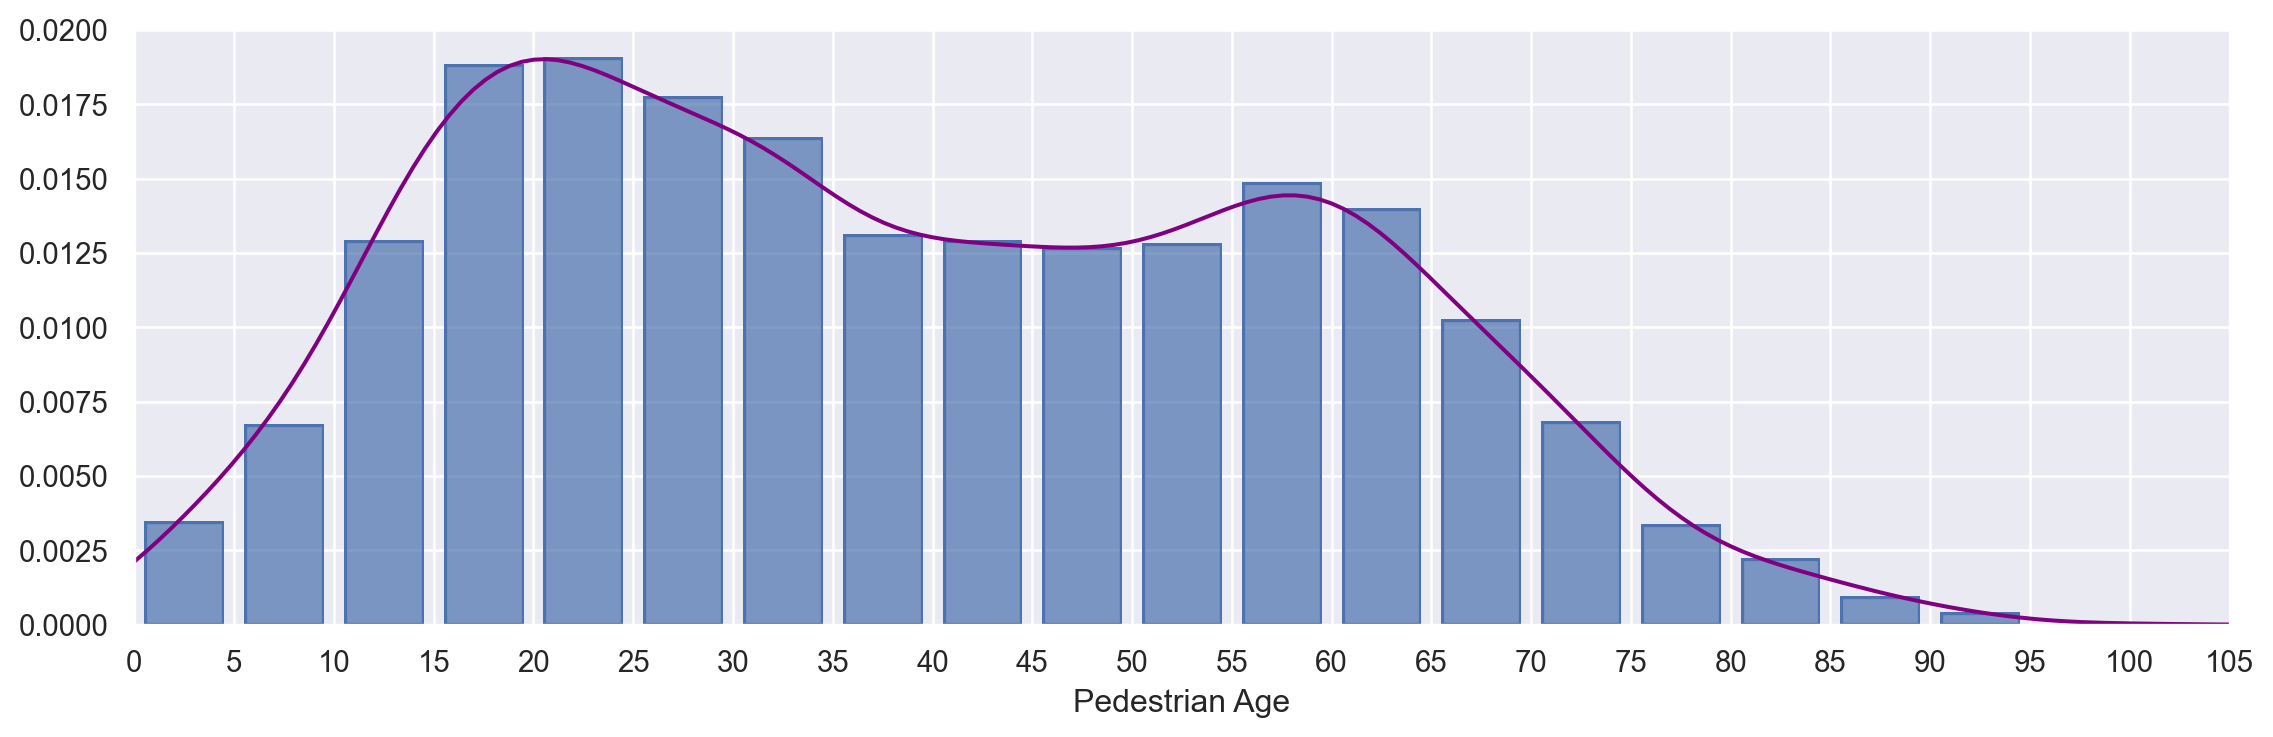

In [5]:
data = (df
        .query("`Person Age` != 'DOB Invalid'")
        .replace({'Less Than 1 Year Old':0})
)

data['Person_age'] = data['Person Age'].astype(float)

(
    so.Plot(data,
            x='Person_age',)
      .add(so.Bar(), so.Hist(stat='density', bins=20, binwidth=5, binrange=(-10,120)))
      .scale(x=so.Continuous().tick(every=5))
      .add(so.Line(color='purple'), so.KDE()) # label='Kernel Density'
      .layout(size=(12,4))
      .limit(x=(0,105))
      .label(x='Pedestrian Age')
      #.save('./figure/age.png', dpi=300, bbox_inches='tight')
)

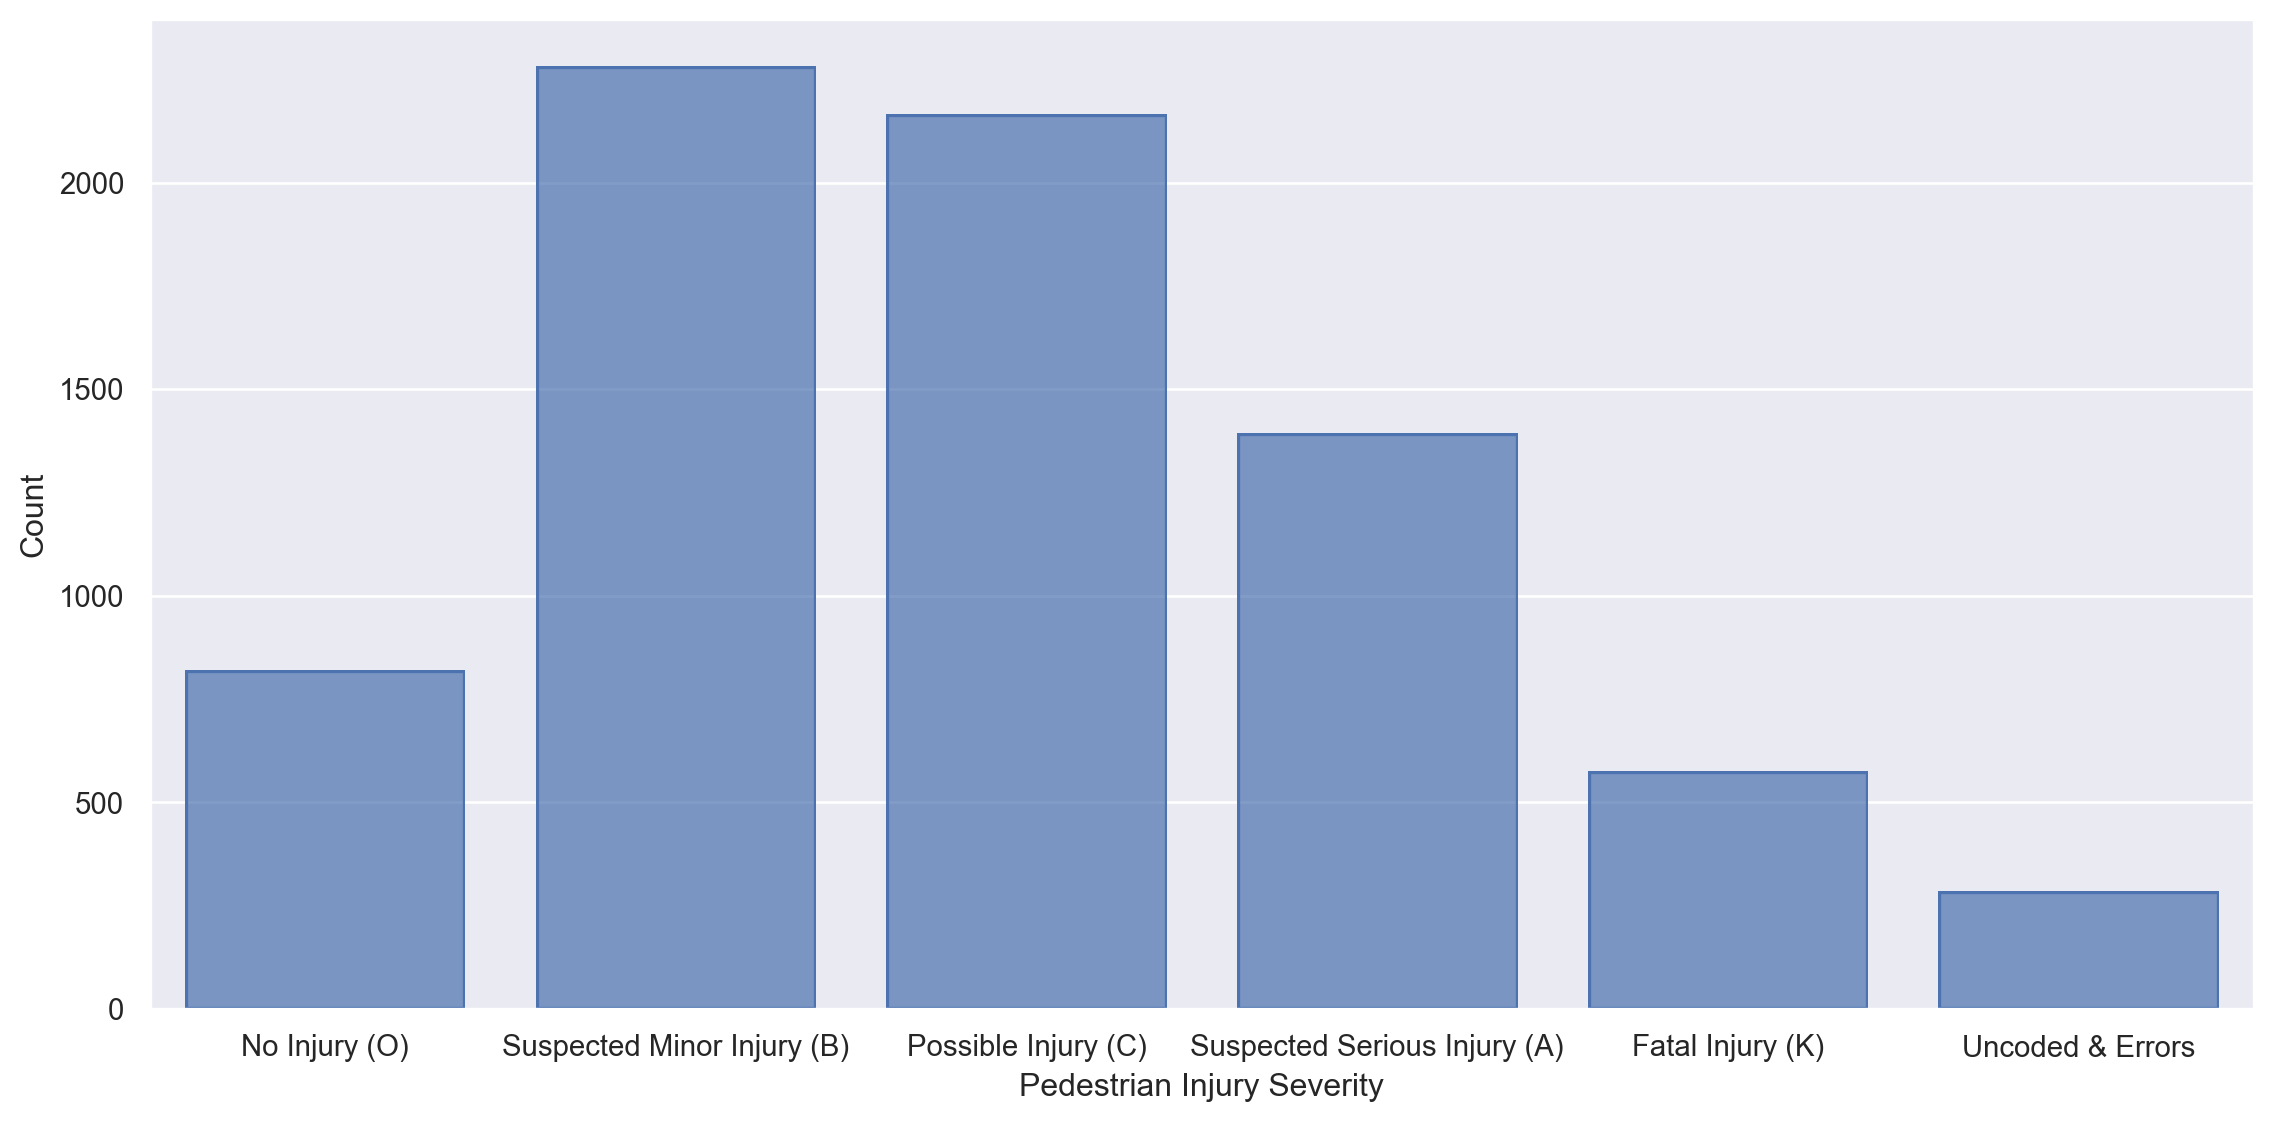

In [6]:
(
    so.Plot(data=df,
    x='Person Degree of Injury',
    #y='lifeExp',
    #color='Person Gender'
           )
      .add(so.Bar(), so.Hist(), so.Dodge())
      .scale(x=so.Nominal(order=["No Injury (O)", \
                                      "Suspected Minor Injury (B)", \
                                      "Possible Injury (C)", \
                                      "Suspected Serious Injury (A)", \
                                      "Fatal Injury (K)", \
                                      "Uncoded & Errors"]))
      .layout(size=(12,6))
      .label(x='Pedestrian Injury Severity', y='Count')
     .save('./figure/injury.png', dpi=300, bbox_inches='tight')

)

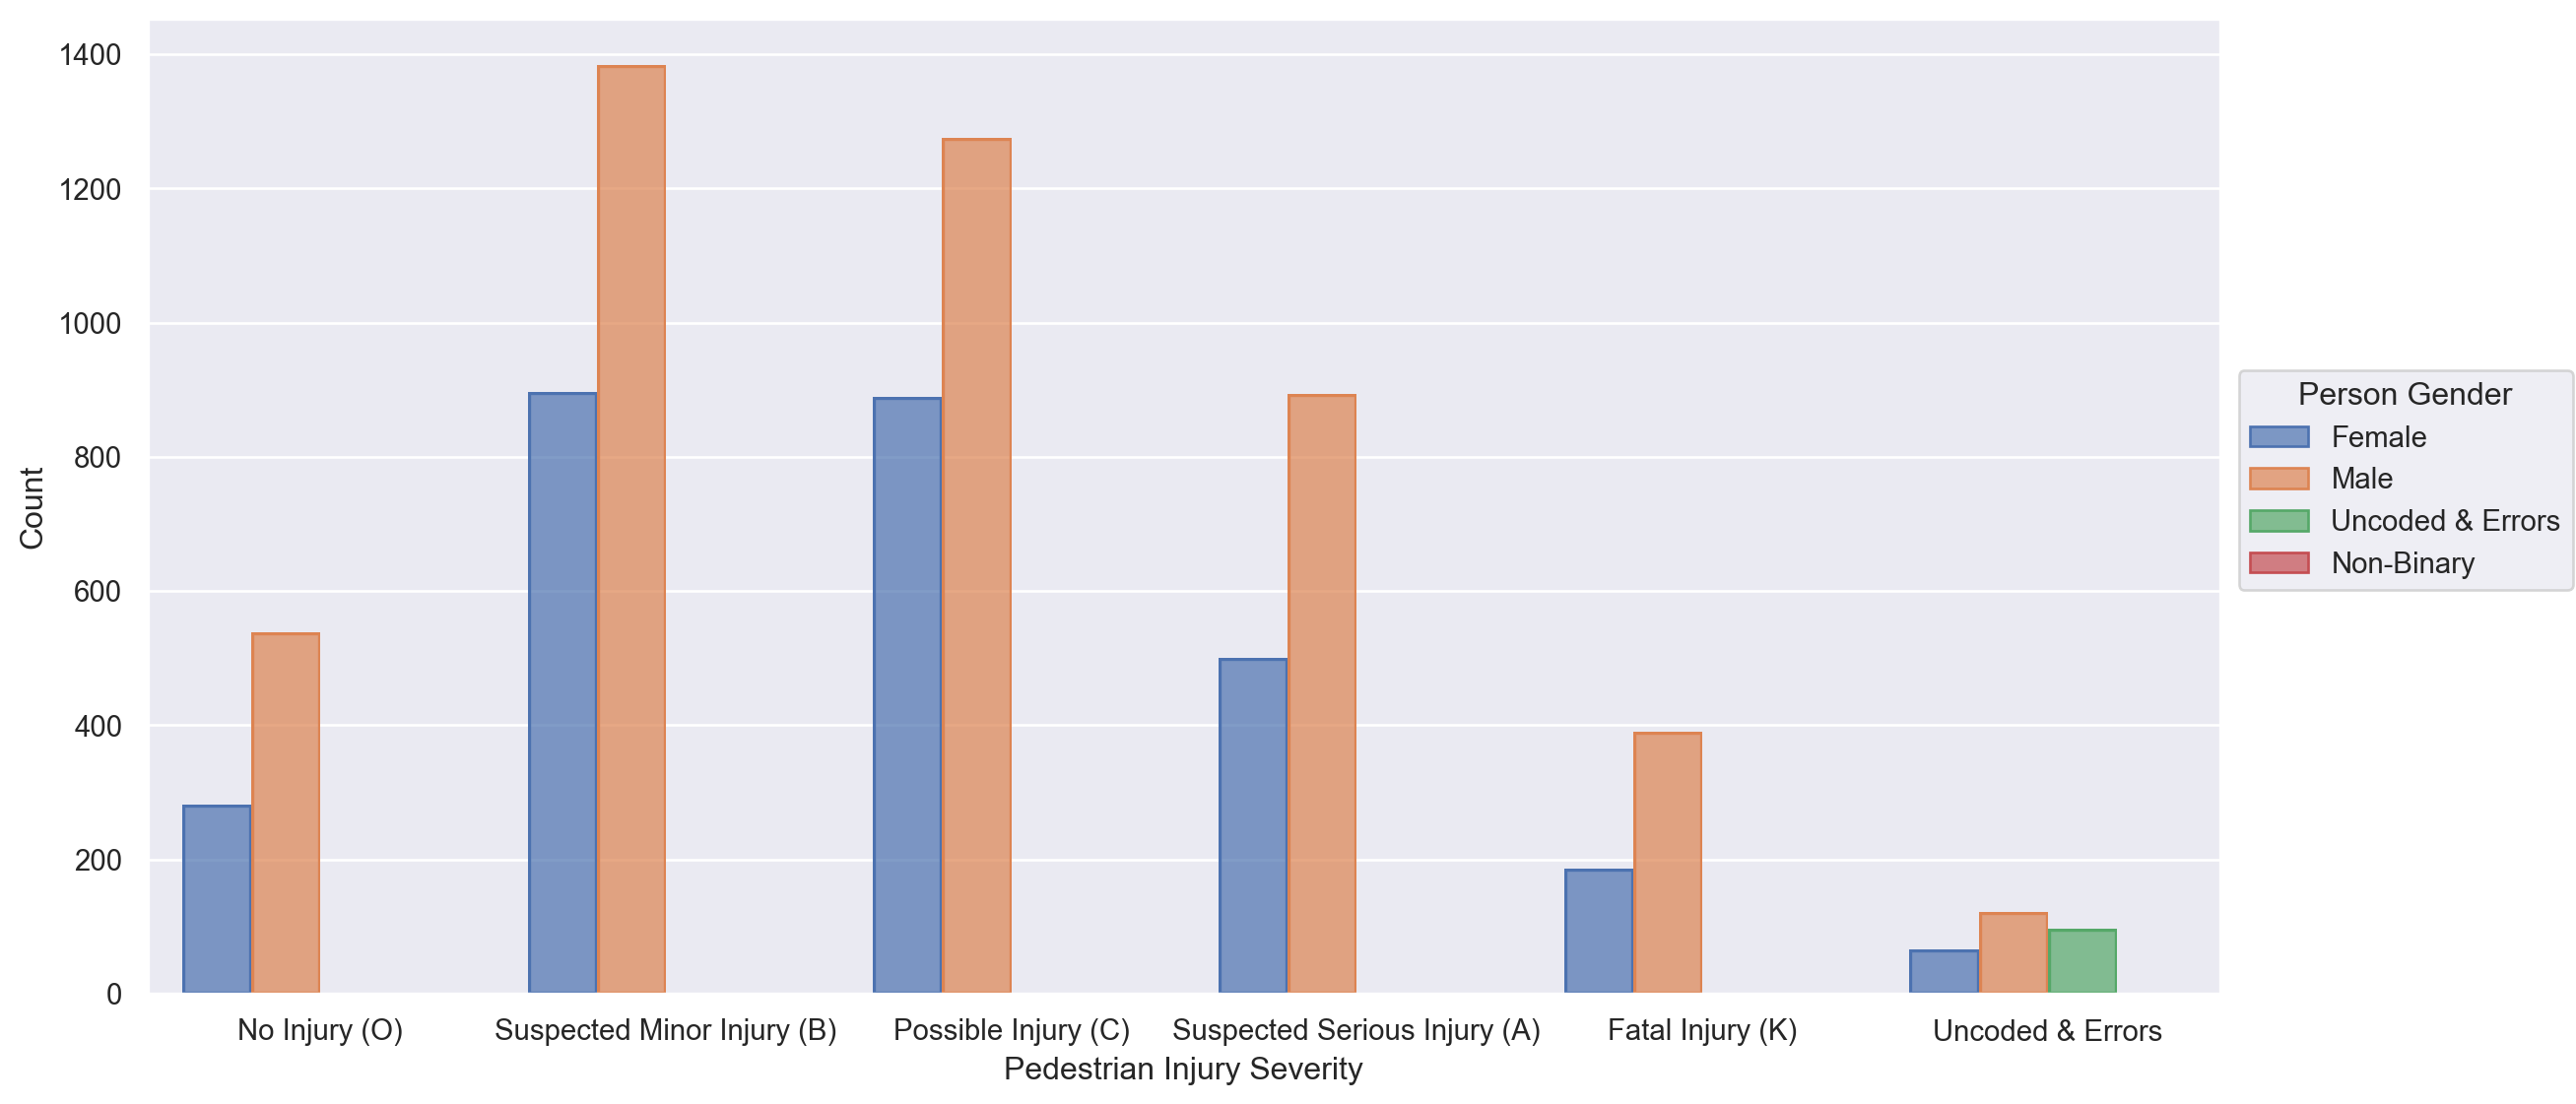

In [7]:
(
    so.Plot(data=df,
    x='Person Degree of Injury',
    #y='lifeExp',
    color='Person Gender'
           )
      .add(so.Bar(), so.Hist(), so.Dodge())
      .scale(x=so.Nominal(order=["No Injury (O)", \
                                      "Suspected Minor Injury (B)", \
                                      "Possible Injury (C)", \
                                      "Suspected Serious Injury (A)", \
                                      "Fatal Injury (K)", \
                                      "Uncoded & Errors"]))
      .layout(size=(12,6))
      .label(x='Pedestrian Injury Severity', y='Count')
     .save('./figure/injury-gender.png', dpi=300, bbox_inches='tight')

)

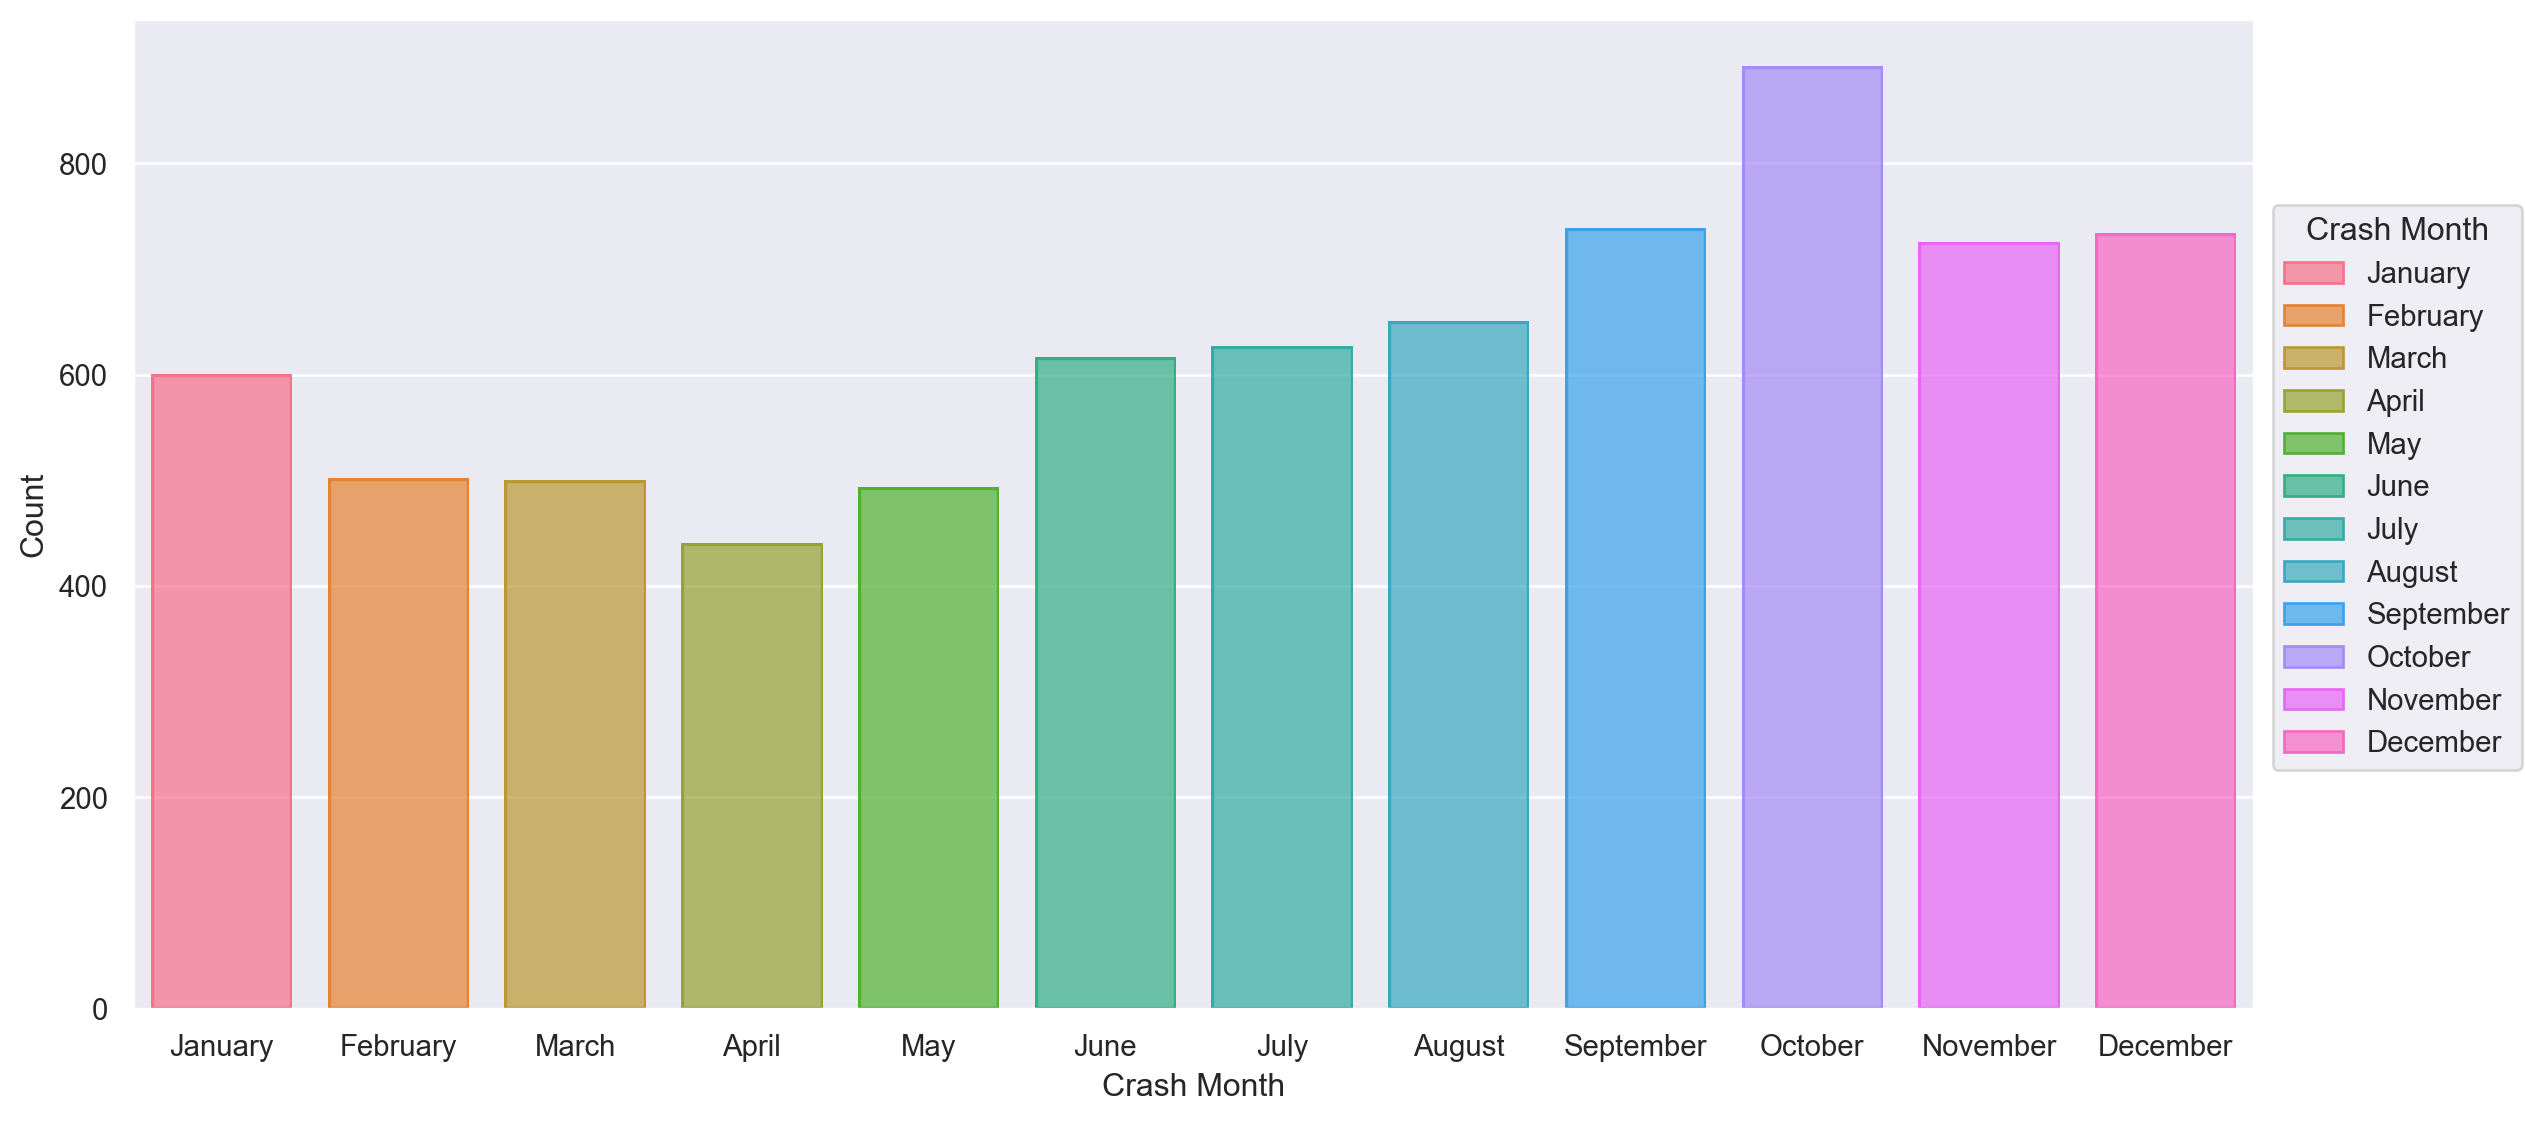

In [8]:
(
    so.Plot(data=df,
    x='Crash Month',
    #y='lifeExp',
    color='Crash Month'
           )
      .add(so.Bar(), so.Hist())
      #.scale(x=so.Nominal(order=[]))
      .layout(size=(12,6))
      .label(x='Crash Month', y='Count')
     .save('./figure/crash-month.png', dpi=300, bbox_inches='tight')

)

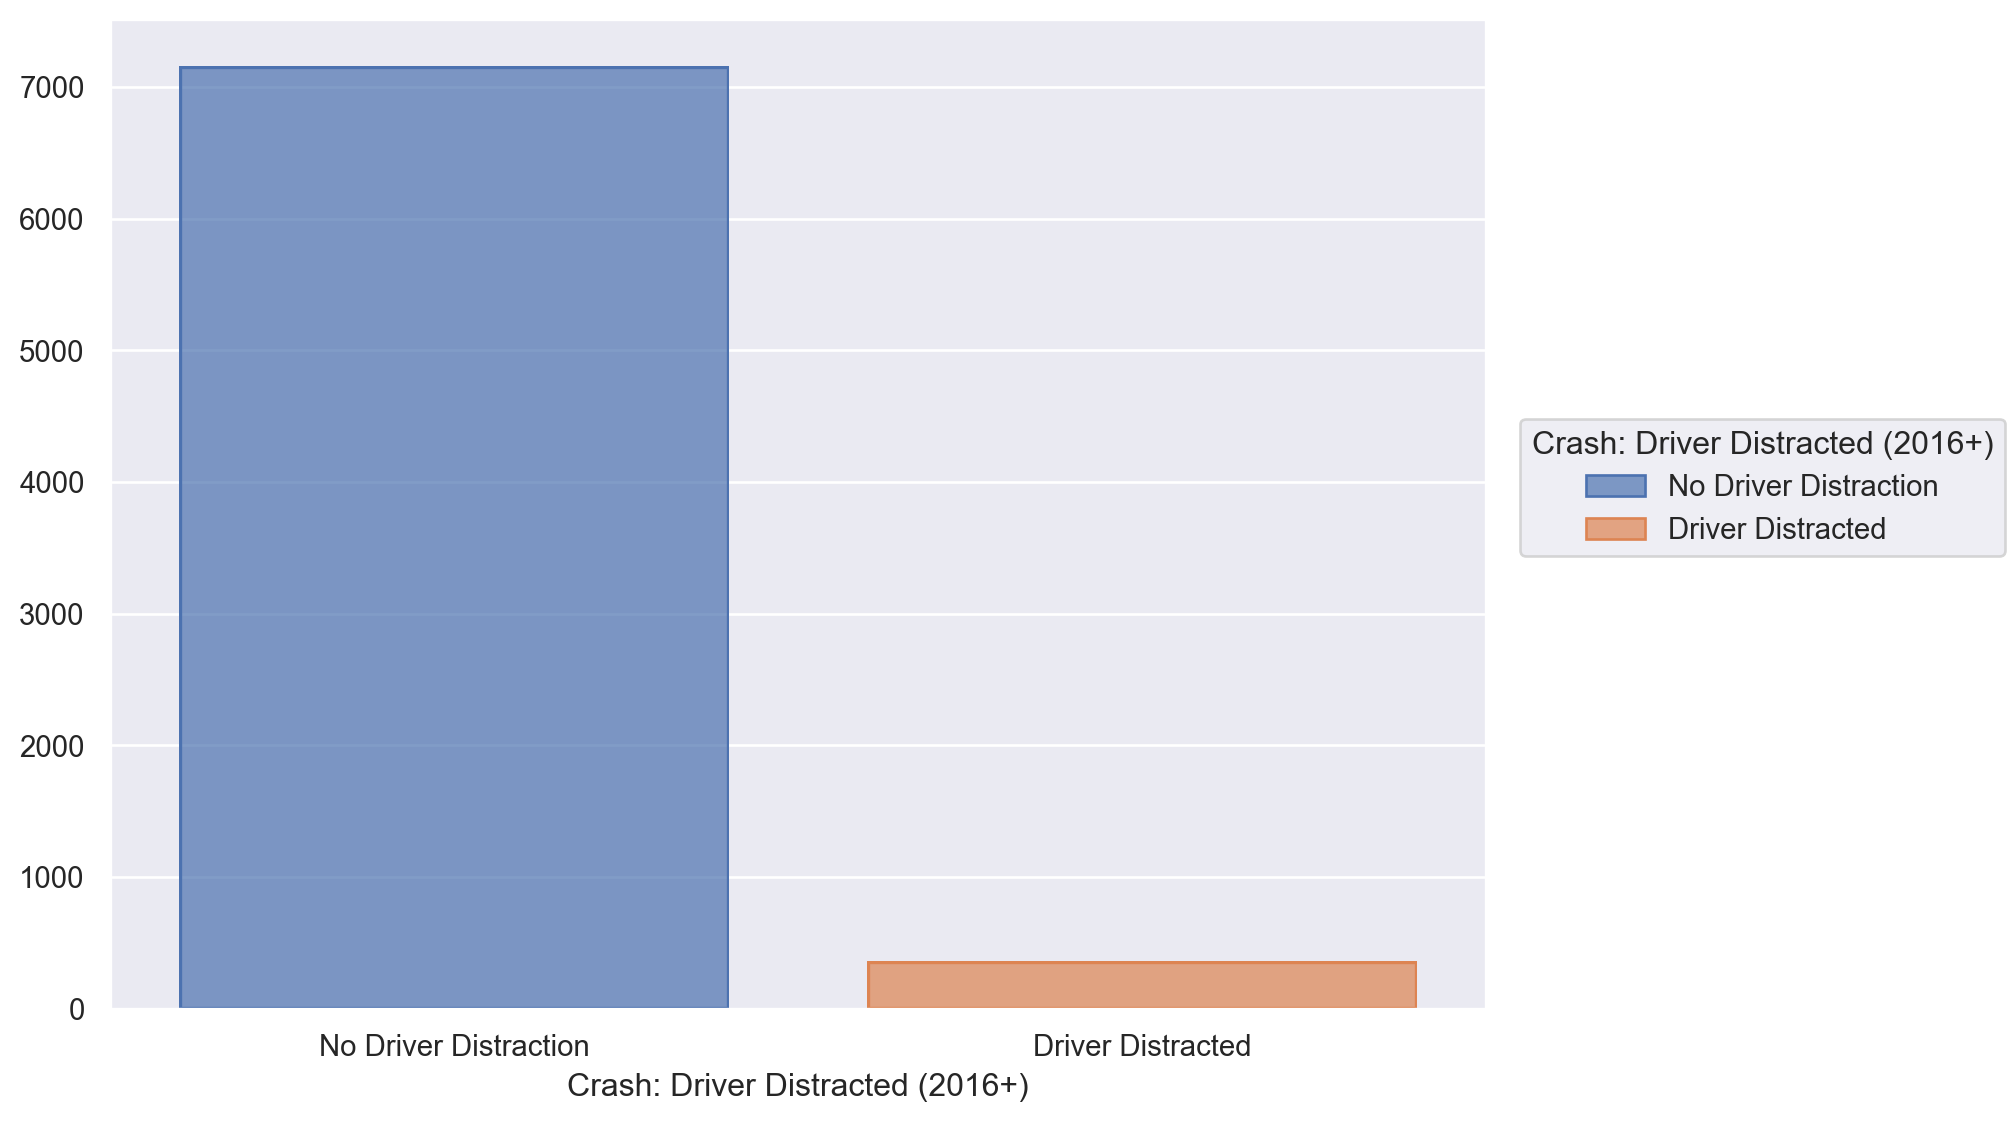

In [9]:
(
    so.Plot(data=df,
    x='Crash: Driver Distracted (2016+)',
    #y='lifeExp',
    color='Crash: Driver Distracted (2016+)',
           )
      .add(so.Bar(), so.Hist())
      #.scale(x=so.Nominal(order=[]))
      .layout(size=(8,6))
     # .label(x='Crash Month', y='Count')
     .save('./figure/distract.png', dpi=300, bbox_inches='tight')

)

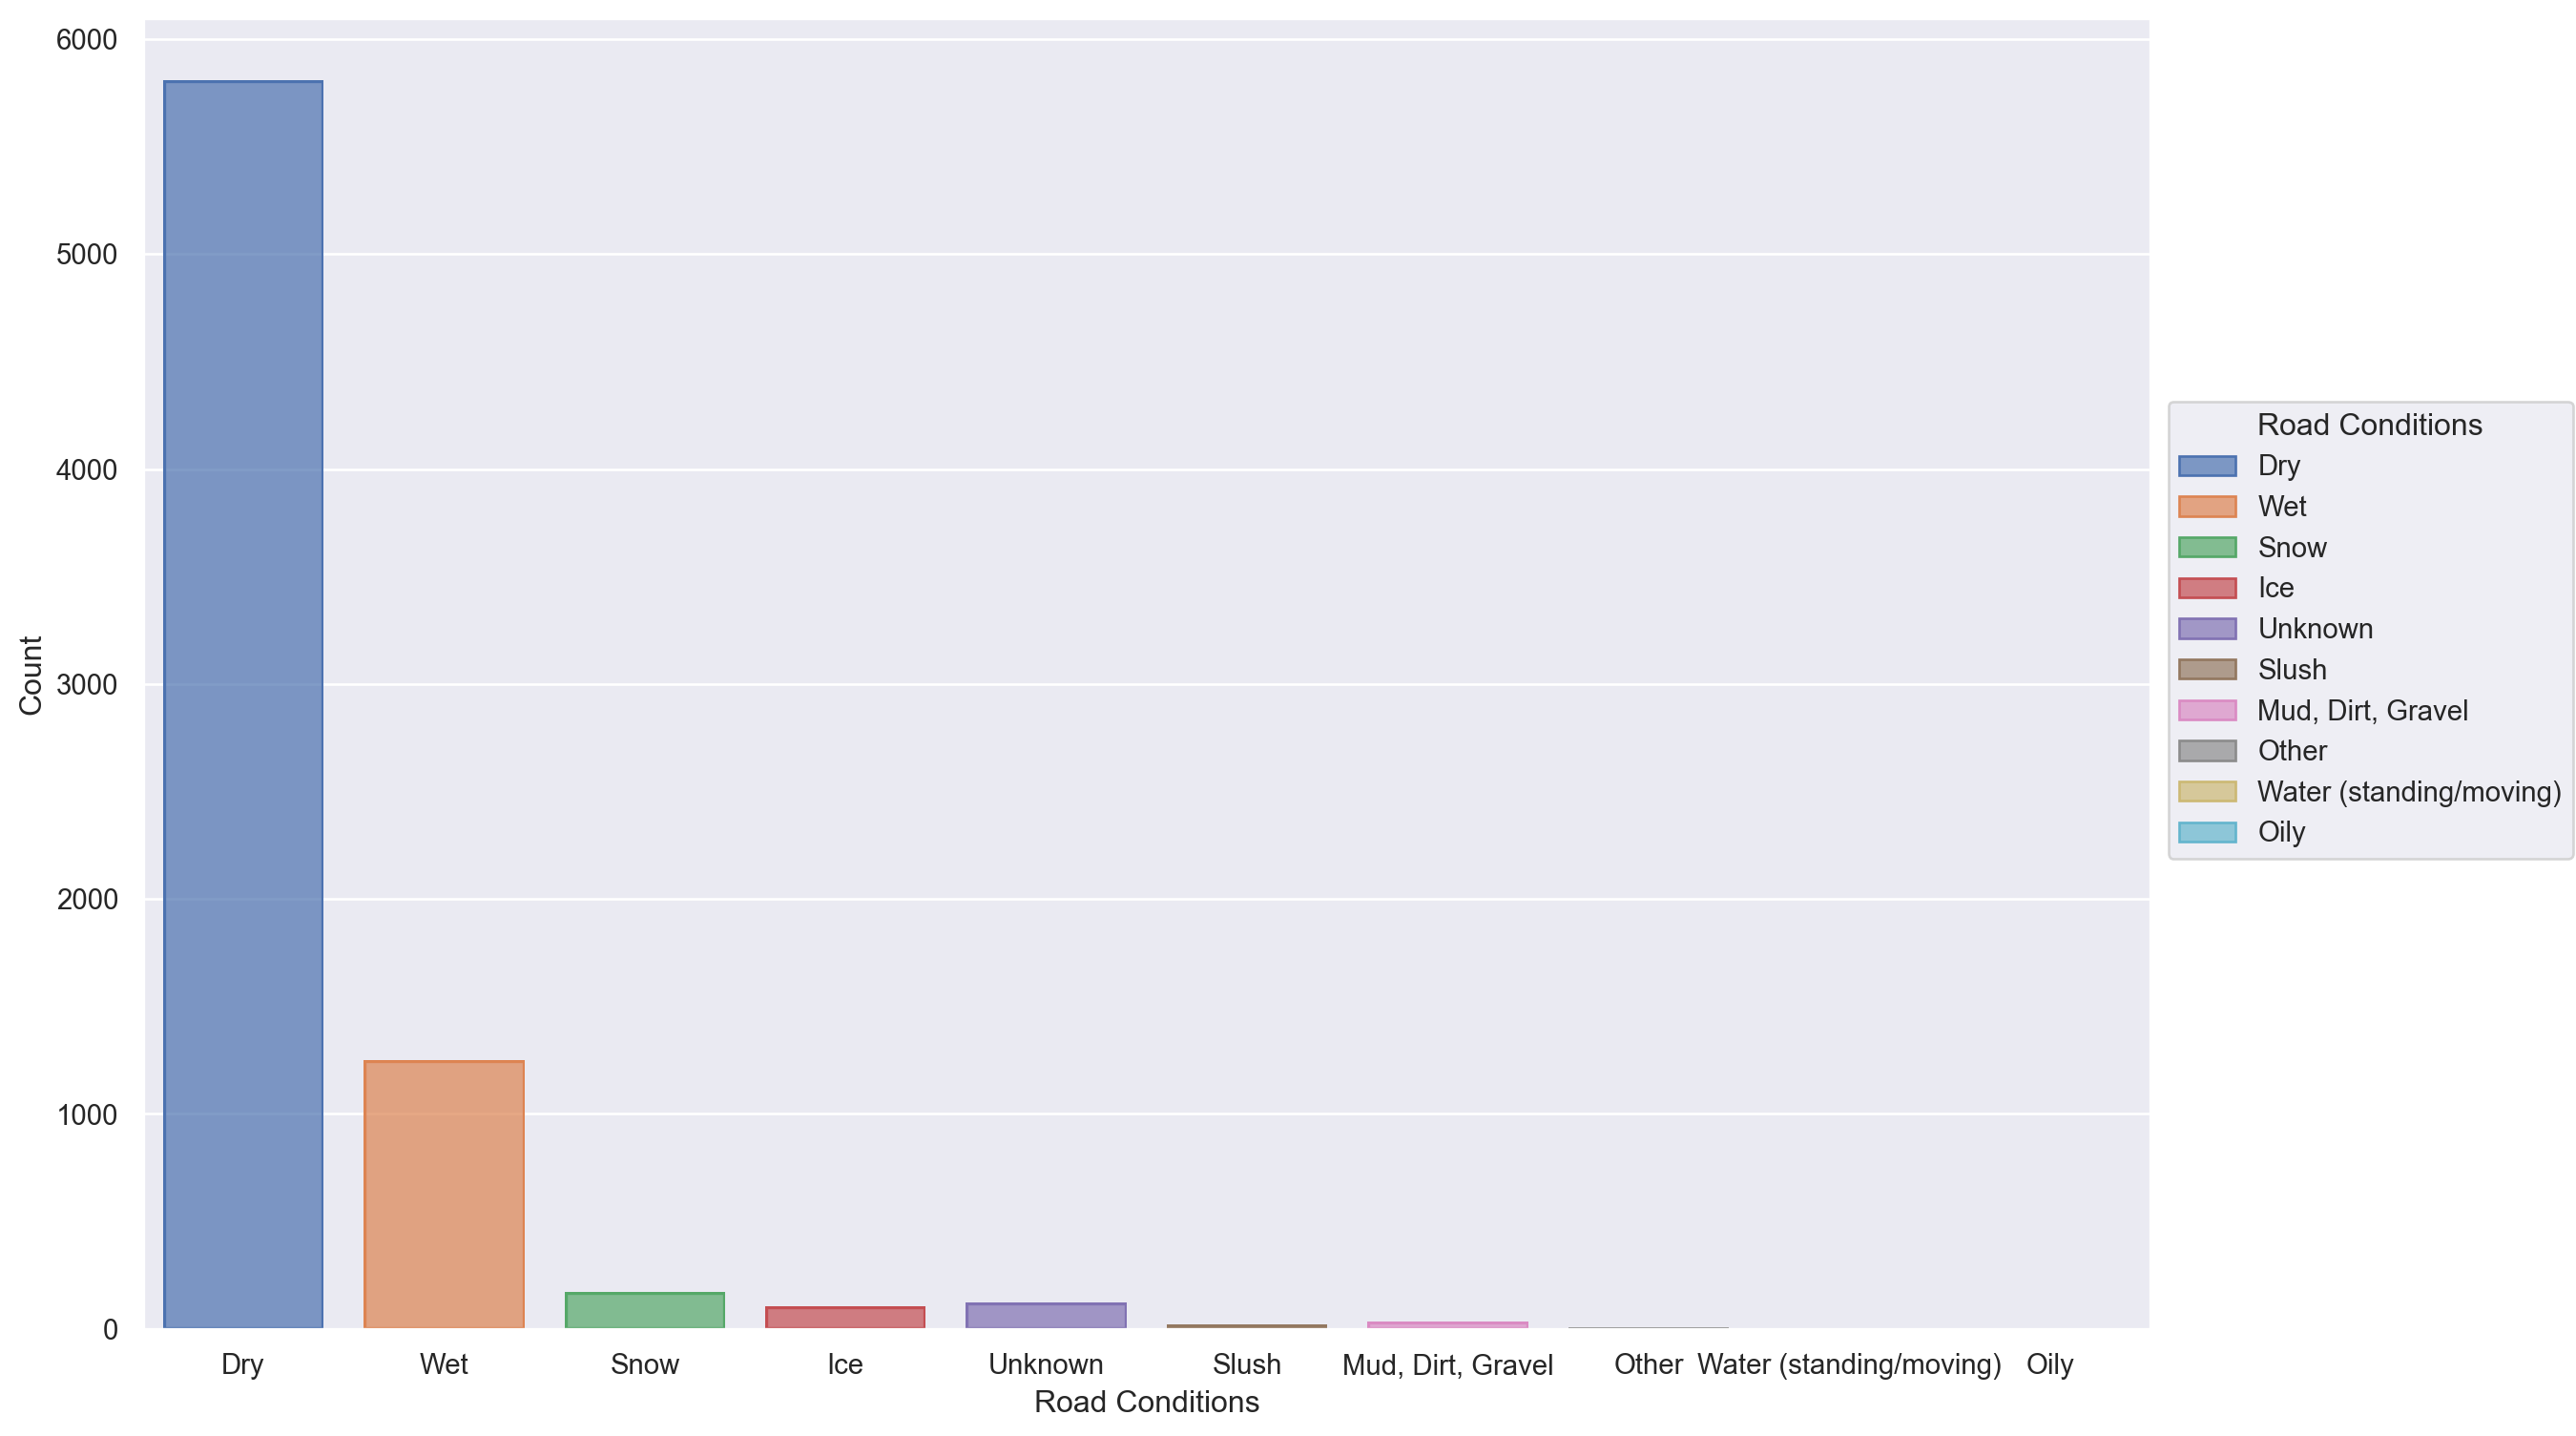

In [10]:
(
    so.Plot(data=df,
    x='Road Conditions',
    #y='lifeExp',
    color='Road Conditions'
           )
      .add(so.Bar(), so.Hist())
      #.scale(x=so.Nominal(order=[]))
      .layout(size=(12,8))
      .label(x='Road Conditions', y='Count')
     #.save('./figure/road.png', dpi=300, bbox_inches='tight')

)

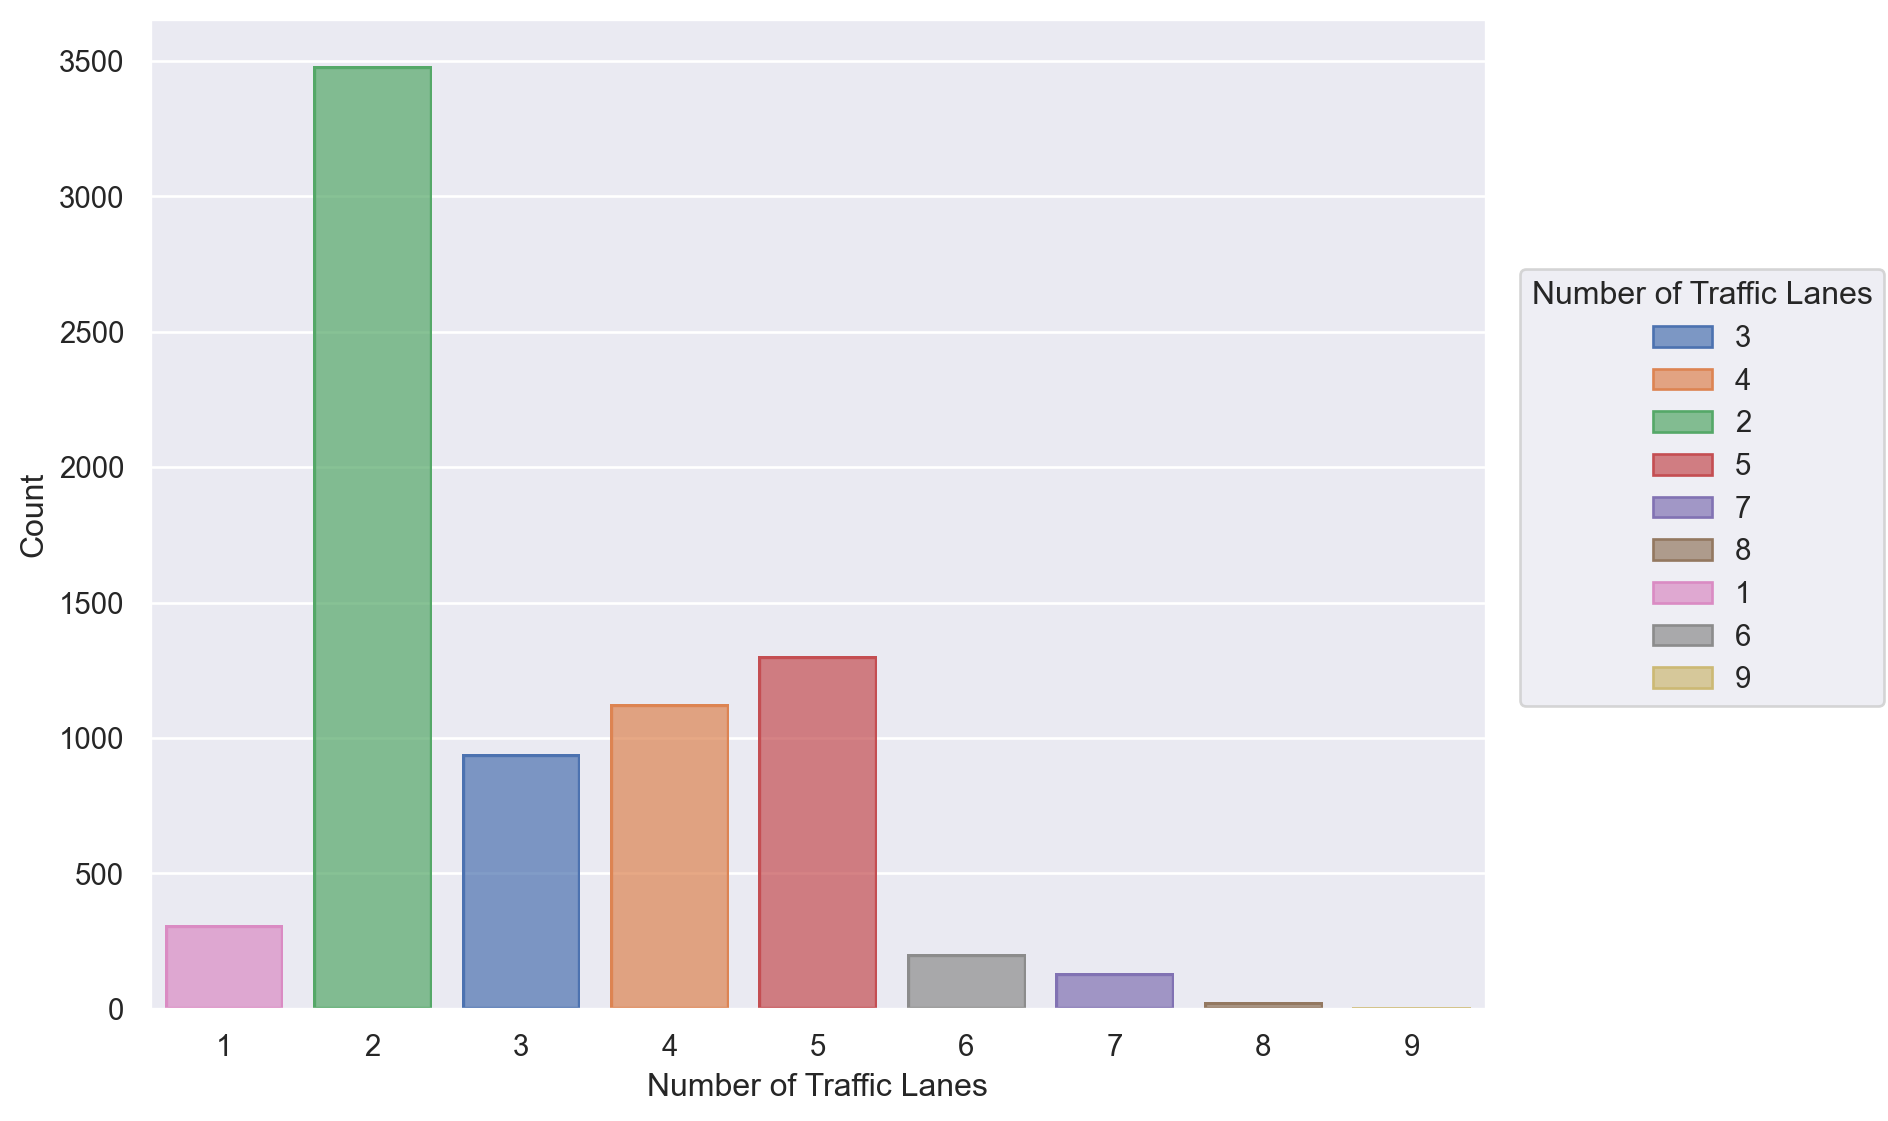

In [11]:
(
    so.Plot(data=(df
                 .query("`Number of Traffic Lanes` != 'Crash Occurred on Other Than a Roadway'")),
    x='Number of Traffic Lanes',
    #y='lifeExp',
    color='Number of Traffic Lanes'
           )
      .add(so.Bar(), so.Hist())
      .scale(x=so.Nominal(order=np.arange(1,10).astype(str)))
      .layout(size=(8,6))
      .label(x='Number of Traffic Lanes', y='Count')
     #.save('./figure/lanes.png', dpi=300, bbox_inches='tight')

)

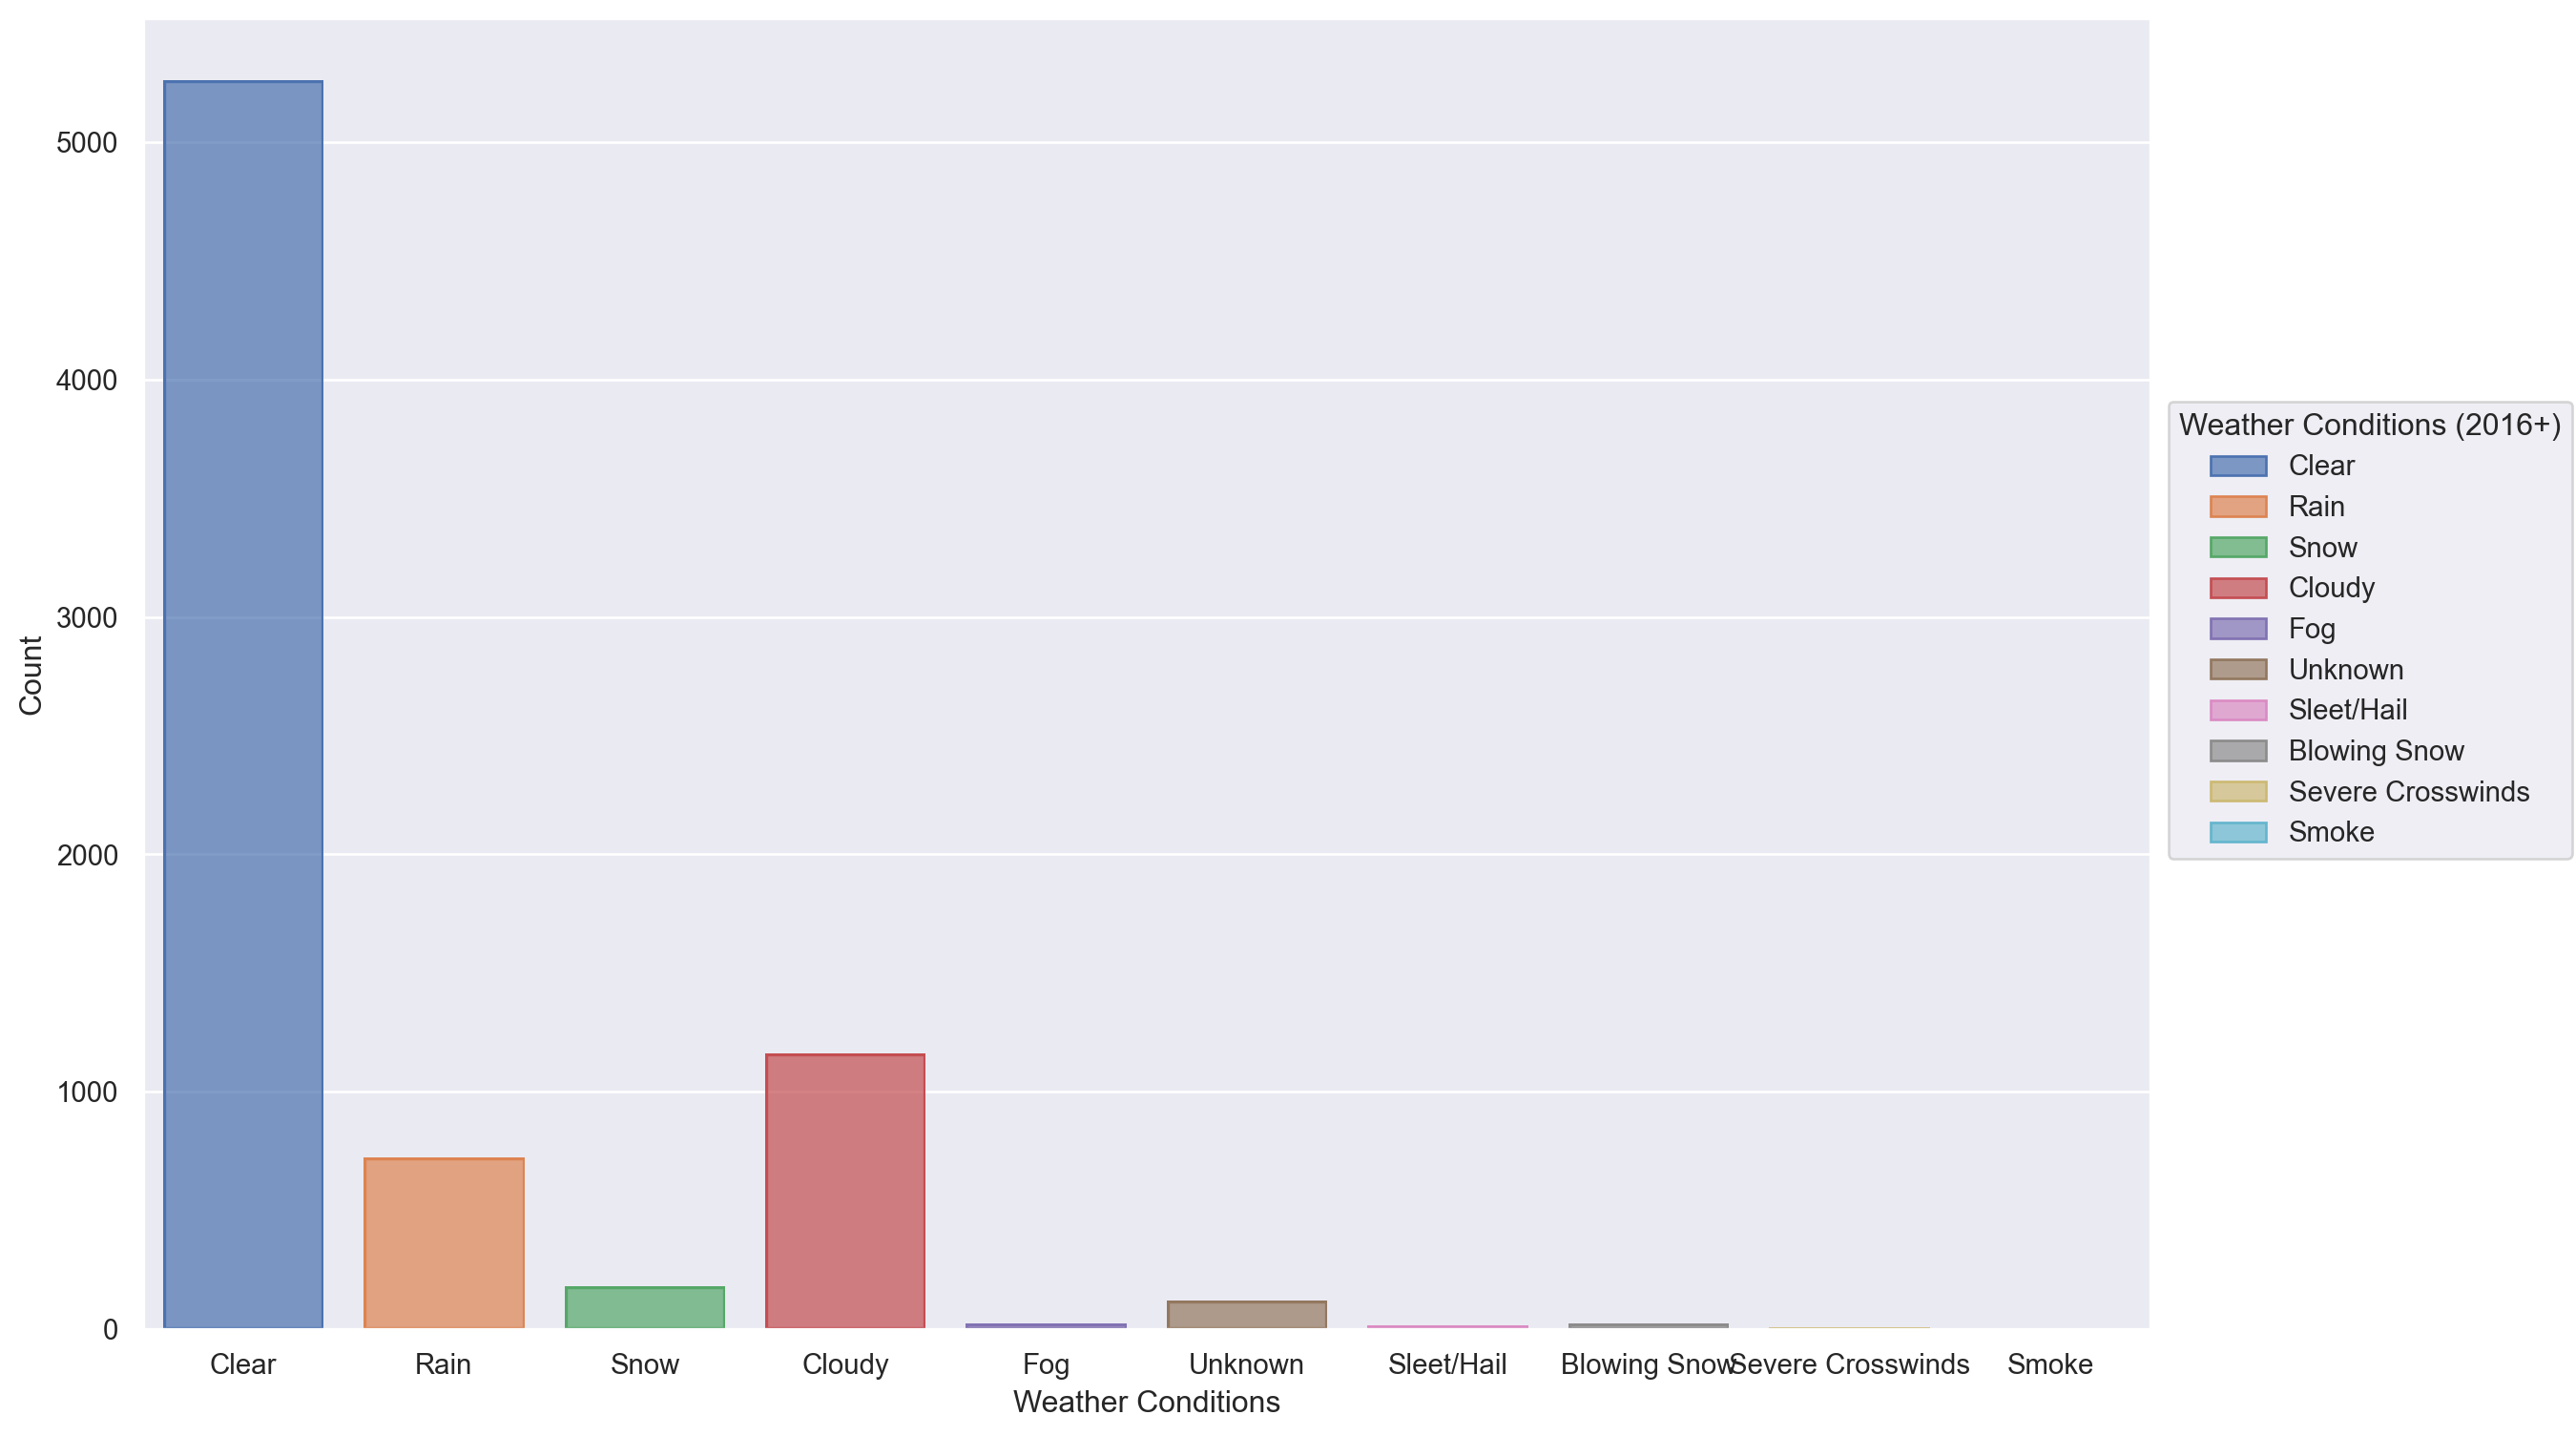

In [12]:
(
    so.Plot(data=df,
    x='Weather Conditions (2016+)',
    #y='lifeExp',
    color='Weather Conditions (2016+)'
           )
      .add(so.Bar(), so.Hist())
      #.scale(x=so.Nominal(order=np.arange(1,10).astype(str)))
      .layout(size=(12,8))
      .label(x='Weather Conditions', y='Count')
     #.save('./figure/weather.png', dpi=300, bbox_inches='tight')

)

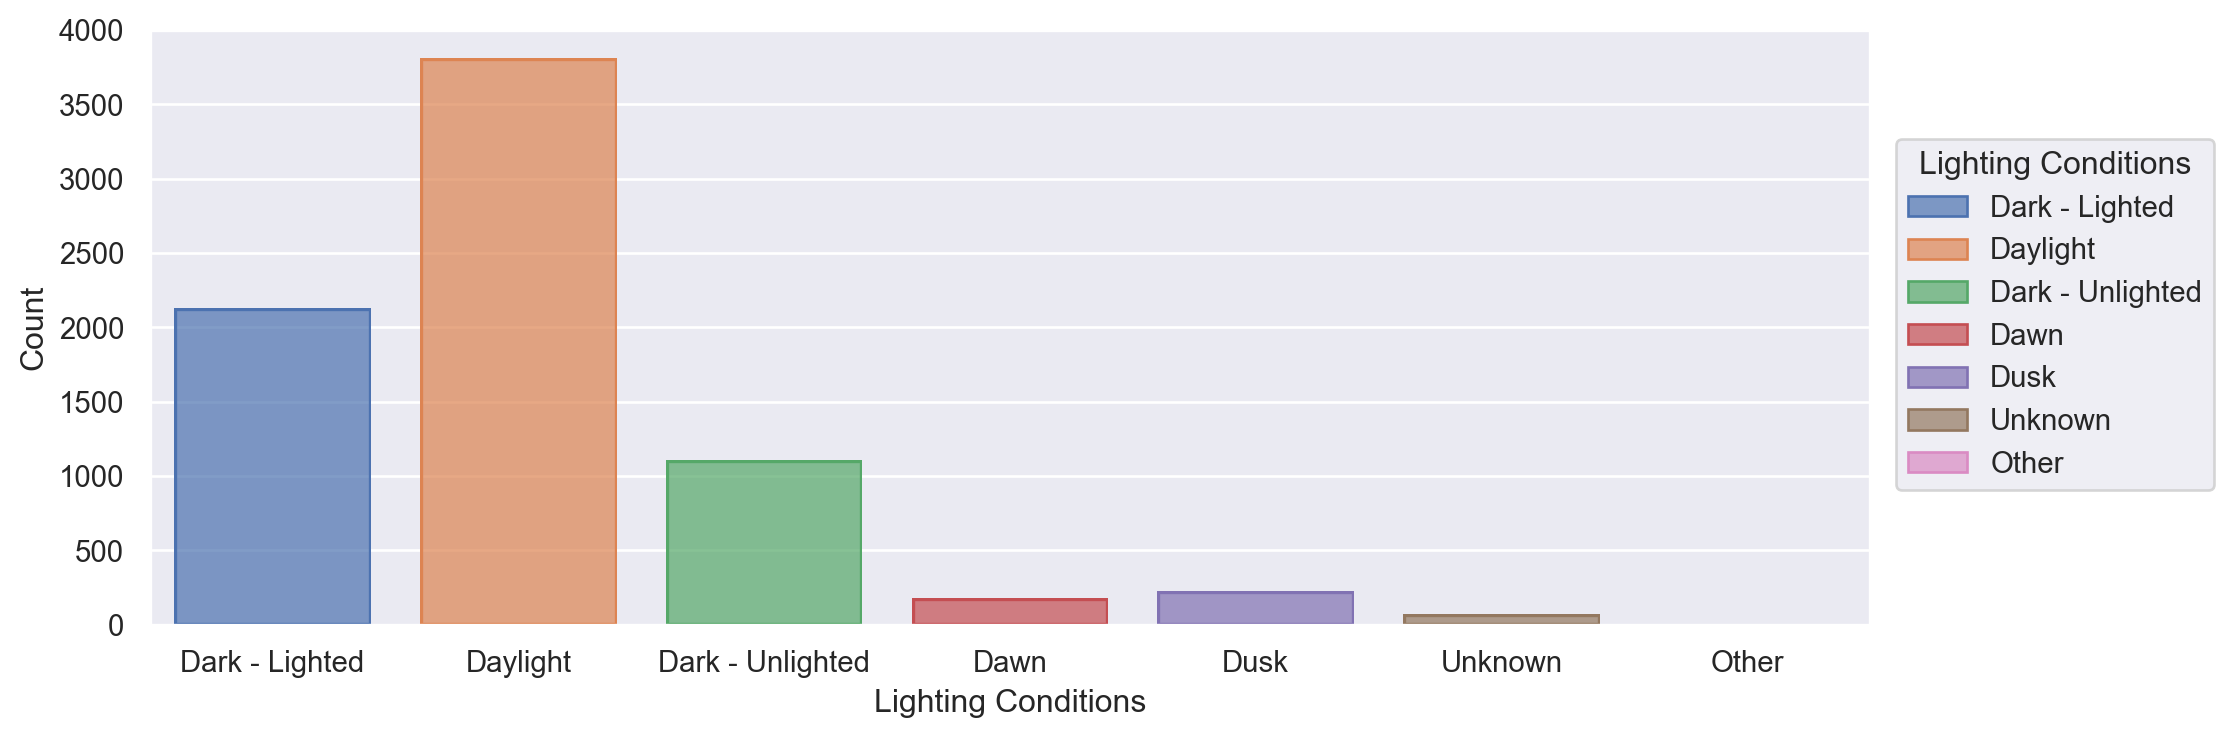

In [13]:
(
    so.Plot(data=df,
    x='Lighting Conditions',
    #y='lifeExp',
    color='Lighting Conditions'
           )
      .add(so.Bar(), so.Hist())
      #.scale(x=so.Nominal(order=np.arange(1,10).astype(str)))
      .layout(size=(10,4))
      .label(x='Lighting Conditions', y='Count')
     #.save('./figure/light.png', dpi=300, bbox_inches='tight')

)

In [14]:
data=df['Speed Limit at Crash Site'].value_counts().reset_index()
data.columns = ['Speed Limit at Crash Site','count']
data

,Speed Limit at Crash Site,count
0,25,2301
1,35,1521
2,45,915
3,30,801
4,55,708
5,40,629
6,Uncoded & Errors,248
7,50,165
8,70,82
9,15,81


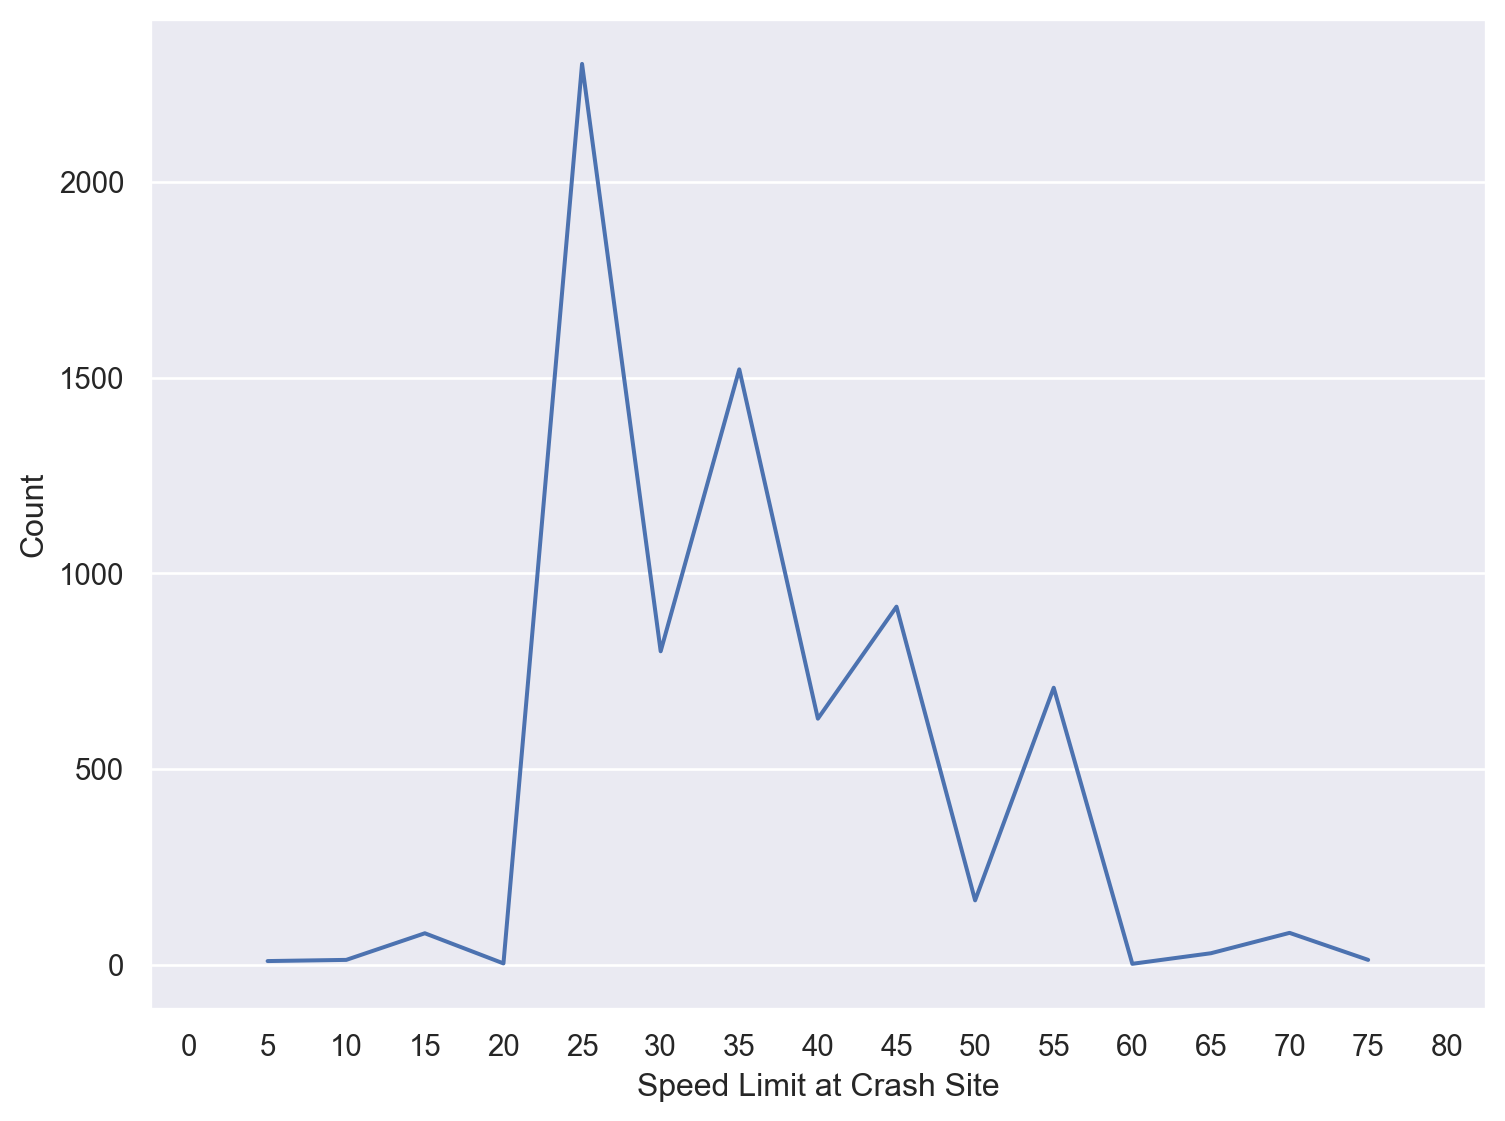

In [15]:
data=df['Speed Limit at Crash Site'].value_counts().reset_index()
data.columns = ['Speed Limit at Crash Site','count']

(
    so.Plot(data=data,
            x='Speed Limit at Crash Site',
            y='count',
            #group='country',
            #color='continent'
           )
    .scale(x=so.Nominal(order=np.arange(0,85,5).astype(str)))
    .add(so.Line())
    .layout(size=(8,6))
    .label(x='Speed Limit at Crash Site', y='Count')
)

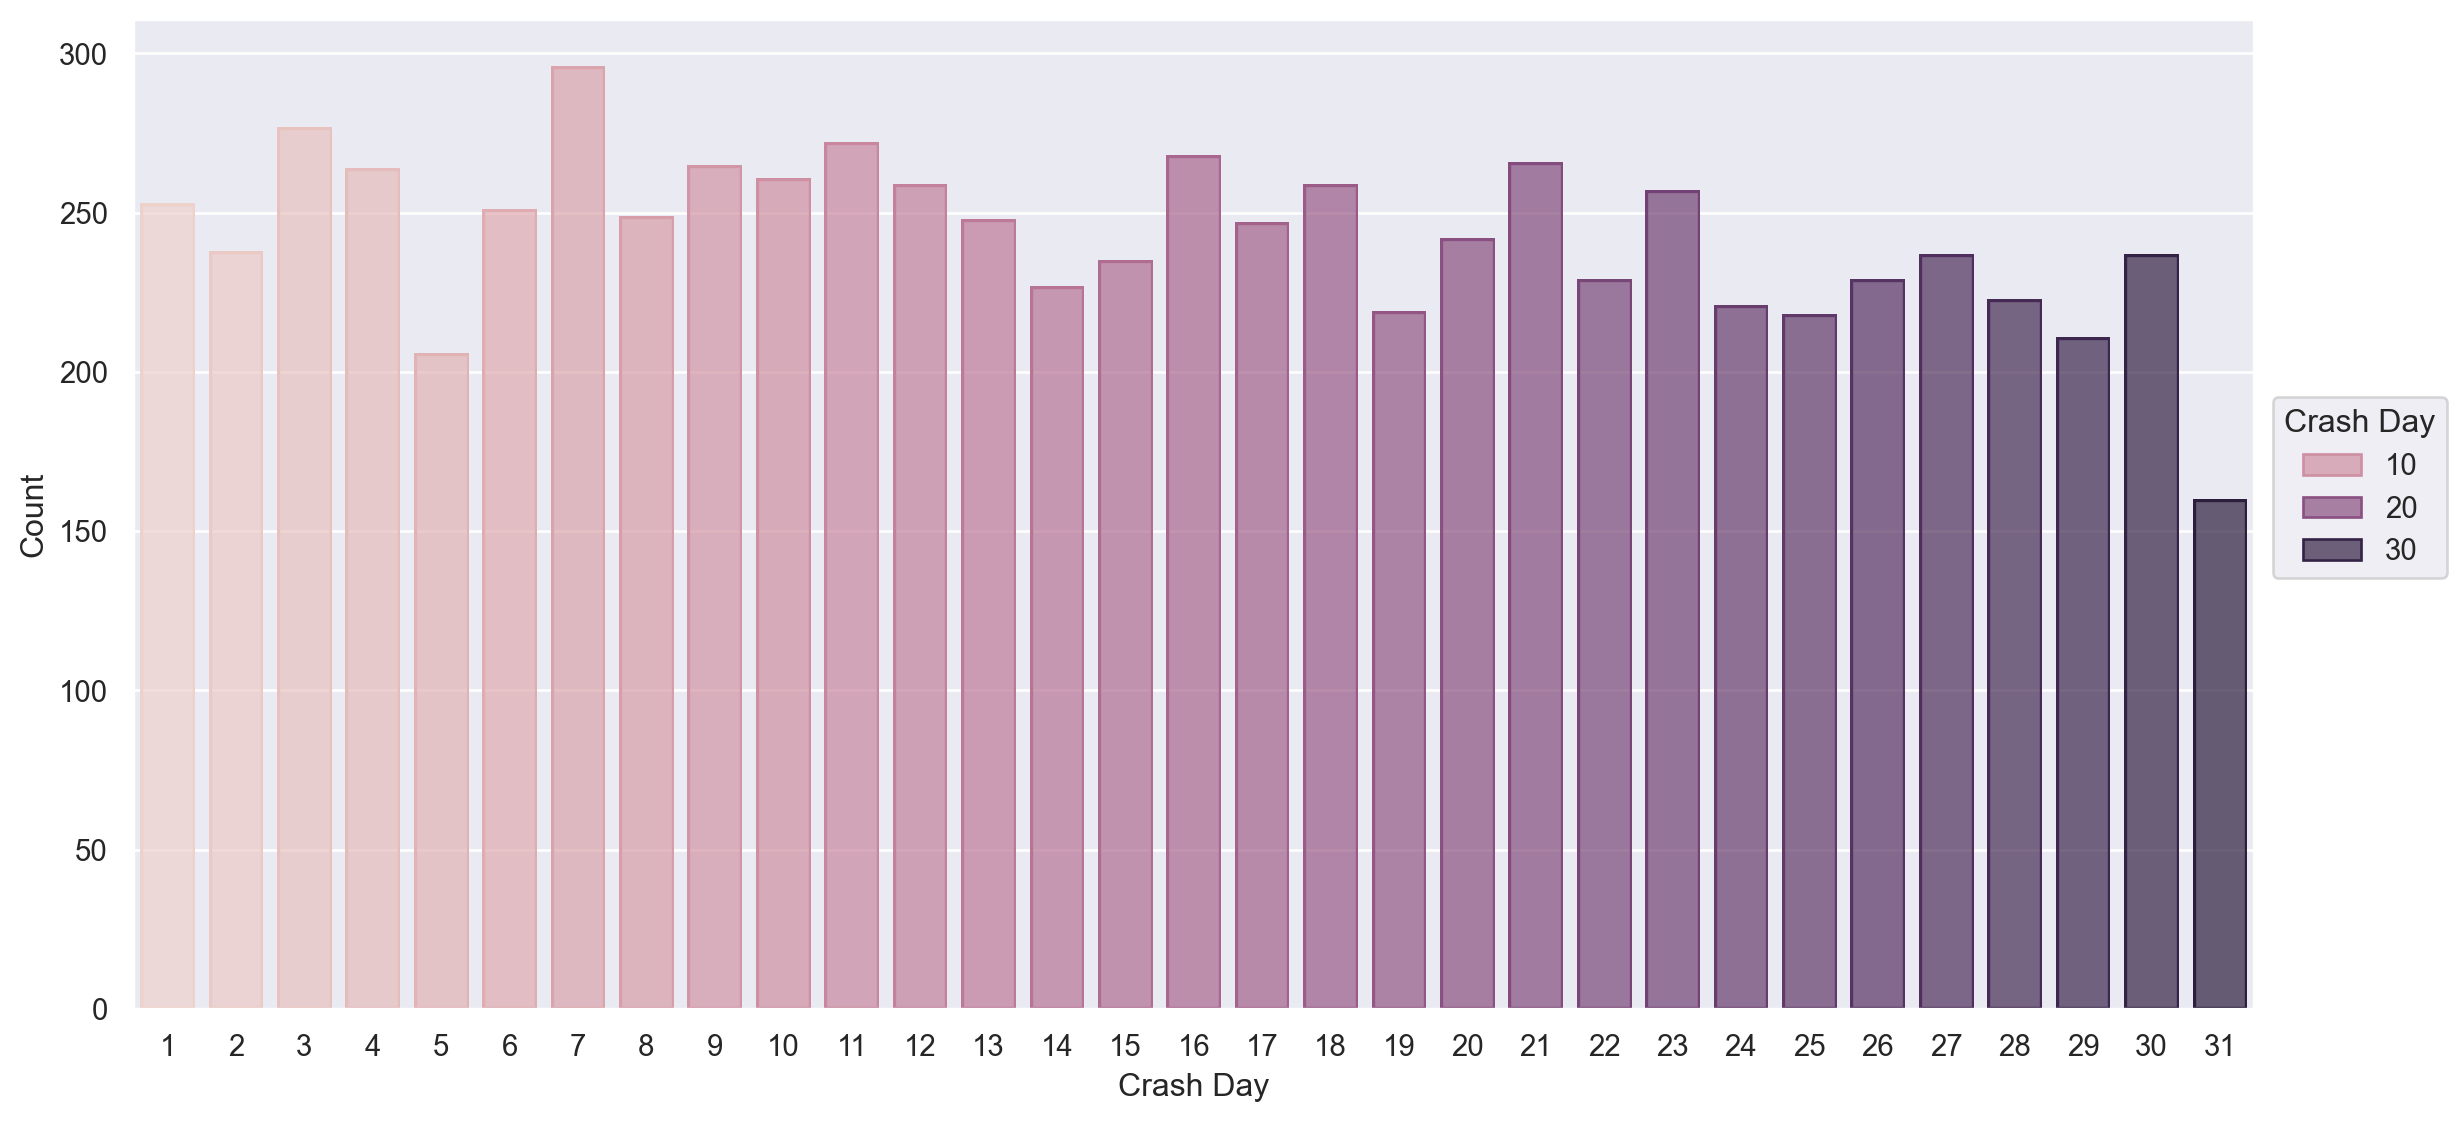

In [16]:
(
    so.Plot(data=df,
    x='Crash Day',
    #y='lifeExp',
    color='Crash Day'
           )
      .add(so.Bar(), so.Hist(bins=31))
      .scale(x=so.Nominal())
      .layout(size=(12,6))
      .label(x='Crash Day', y='Count')
     #.save('./figure/light.png', dpi=300, bbox_inches='tight')

)

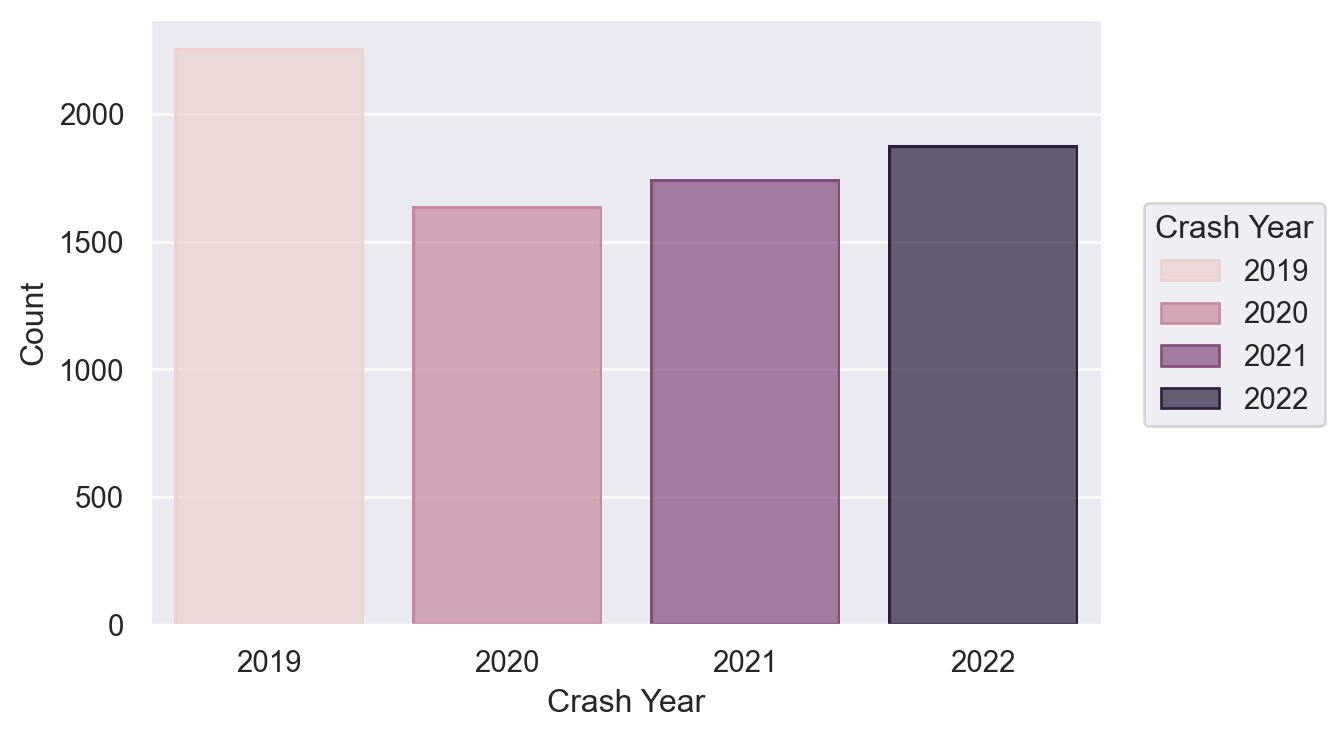

In [17]:
(
    so.Plot(data=df,
    x='Crash Year',
    #y='lifeExp',
    color='Crash Year'
           )
      .add(so.Bar(), so.Hist(bins=4))
      .scale(x=so.Nominal())
      .layout(size=(6,4))
      .label(x='Crash Year', y='Count')
      .save('./figure/year.png', dpi=300, bbox_inches='tight')

)

### 2. Interactive Dashboard

In [18]:
import plotly.express as px
from dash import Dash, html, dcc, Input, Output

In [19]:
df['date'] = df['Crash Month'] + " " + \
             df['Crash Day'].astype(str) + ', ' +\
             df['Crash Year'].astype(str)
df['date']

df['time'] = df['Time of Day'].apply(lambda x: x.split(sep=' - ')[0])
df.time.replace({'12:00 midnight':'12:00 AM',
                 '12:00 noon':'12:00 PM'}, inplace=True)
df.time.unique()

df['datetime_combined'] = df['date'] + ' at ' + df['time']
df['datetime_combined']

df['datetime'] = pd.to_datetime(df['datetime_combined'], 
               format="%B %d, %Y at %I:%M %p",
               errors="coerce" #ignore errors (time as Unknown does not match the format, in coerce, invalid set as NaT not a time)
              ) 

df.set_index('datetime', inplace=True)
df.head()

,Crash Instance,Highway Class,Rural/Urban Area (2016+),Highway Number,Number of Traffic Lanes,Relation to Roadway,Area of Road at Crash,Road Conditions,Speed Limit at Crash Site,Posted Speed Limit,...,Person Restraint,Person Airbag Deployed,Person Ejection,Person Trapped,Person Age,Crash Report,Map,date,time,datetime_combined
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 02:00:00,202141,"County Road, City Street, or Unknown",Urban,Local Road or Unknown,3,On the Road,Other Non-Freeway Areas - Straight Roadway (no...,Dry,25,Posted Speed Limit,...,No Belts Available,Not Equipped,Not Ejected,Not Trapped,DOB Invalid,UD-10,Map,"January 1, 2021",2:00 AM,"January 1, 2021 at 2:00 AM"
2019-01-01 02:00:00,2019105,Michigan Route,Urban,M-102/US-102,4,On the Road,Other Non-Freeway Areas - Straight Roadway (no...,Wet,40,Posted Speed Limit,...,No Belts Available,Not Equipped,Not Ejected,Not Trapped,DOB Invalid,UD-10,Map,"January 1, 2019",2:00 AM,"January 1, 2019 at 2:00 AM"
2019-01-02 16:00:00,2019332,"County Road, City Street, or Unknown",Urban,Local Road or Unknown,2,On the Road,Other Non-Freeway Areas - Curved Roadway (not ...,Snow,35,Posted Speed Limit,...,No Belts Available,Not Equipped,Not Ejected,Not Trapped,13,UD-10,Map,"January 2, 2019",4:00 PM,"January 2, 2019 at 4:00 PM"
2019-01-02 20:00:00,2019371,"County Road, City Street, or Unknown",Urban,Local Road or Unknown,2,On the Road,Intersection Crash - Within Intersection,Wet,30,Posted Speed Limit,...,No Belts Available,Not Equipped,Not Ejected,Not Trapped,24,UD-10,Map,"January 2, 2019",8:00 PM,"January 2, 2019 at 8:00 PM"
NaT,2019582,Michigan Route,Rural,M-60/M-60BR,2,On the Road,Intersection Crash - Within Intersection,Dry,25,Not Posted,...,No Belts Available,Not Equipped,Not Ejected,Not Trapped,16,UD-10,Map,"January 3, 2019",12:00 Noon,"January 3, 2019 at 12:00 Noon"


In [20]:
df[['Person Degree of Injury']].value_counts()

Person Degree of Injury     
Suspected Minor Injury (B)      2282
Possible Injury (C)             2167
Suspected Serious Injury (A)    1394
No Injury (O)                    821
Fatal Injury (K)                 576
Uncoded & Errors                 284
Name: count, dtype: int64

In [21]:
app = Dash(__name__)

# specify the layout of the dashboard
app.layout = html.Div([
    html.H1(children=["MTCF Single Vehicle Pedestrian Crash Dashboard"],
            style={#'backgroundColor':'#619ac3', 
                   'text-align':'center'}),
    
    html.H2(children=dcc.Markdown("Data Source: [Michigan Traffic Crash Facts](https://www.michigantrafficcrashfacts.org/)"),
            style={'text-align':'left'}),
    
    html.H2(children=["IMSE 586 Course Project - Team 15"],
            style={'text-align':'left'}),
    
    html.H2(children=["Section 1. Pedestrian-Single Vehicle Crash Variable Distribution"],            
            style={'backgroundColor':'#EAE8C1', 
                   'text-align':'center',
                   'margin': '1px'}),    
    
    html.H3(children=["Step 1 - Select Date Range"], style={'margin': '10px'}),
    
    dcc.DatePickerRange(id='date_range', 
                        start_date='2019-01-01',
                        end_date='2022-12-31',
                        style={'display': 'flex', 'justify-content': 'left', 
                               'align-items': 'center',}
                       ),   
    
    html.H3(children=["Step 2 - Select Variable to Visualize"],style={'margin': '5px'}),
    
    dcc.Dropdown(["Rural/Urban Area (2016+)","Road Conditions","Lighting Conditions",\
                  "Worst Injury in Crash","Day of Week","Weather Conditions (2016+)",\
                  "Person Gender","Person Degree of Injury","Crash Month",\
                  "Crash: Hit-and-Run","Crash: Drinking","Crash: Intersection",\
                  "Crash: Young Driver","Day of Week","Crash: Driver Distracted (2016+)"],
                  "Road Conditions", id='variable_d'),
    
    html.H3(children=["Step 3 - Visualize by Injury Severity"],style={'margin': '5px'}),
    
    dcc.RadioItems(id='injury', 
                   options={"No":"Do Not Group by Injury Level",
                            "KABCO":"Group by KABCO Injury Level",
                            "Binary":"Group by Binary Injury Level",
                          },
                   value='No', #default option value
                   inline=False, #display options on same line
                 ),    
    
    
    dcc.Graph(id='count_graph'),
    
    html.H2(children=["Section 2. Pedestrian-Single vehicle Crashes Geographical Distribution"],            
            style={'backgroundColor':'#EAE8C1', 
                   'text-align':'center',
                   'margin': '1px'}),
    
    html.H3(children=["Step 1 - Select Date Range"], style={'margin': '10px'}),
    
    dcc.DatePickerRange(id='date_range_geo', 
                        start_date='2019-01-01',
                        end_date='2022-12-31',
                        style={'display': 'flex', 'justify-content': 'left', 'align-items': 'center'}
                       ), 
    
    html.H3(children=["Step 2 - Visualize by Injury Severity"],style={'margin': '10px'}),
    
    dcc.RadioItems(id='injury_geo', 
                   options={"All":"All injury levels",
                            "O":"No Injury (O)",
                            "B":"Suspected Minor Injury (B)",
                            "C":"Possible Injury (C)",
                            "A":"Suspected Serious Injury (A)",
                            "K":"Fatal Injury (K)",
                            
                          },
                   value='All', #default option value
                   inline=False, #display options on same line
                 ),      
    
    dcc.Graph(id='loaction_graph', style = {'margin': '2px'}),
    
])

# specify the callback function (control the behavior of the dashboard behind the scne)

@app.callback(
    Output(component_id='count_graph', component_property='figure'), # output, the function returns to the component 'trend-graph'
    Input(component_id='date_range', component_property='start_date'),
    Input(component_id='date_range', component_property='end_date'),
    Input(component_id='variable_d', component_property='value'),
    Input(component_id='injury', component_property='value'),
)

def update_figure(start_date, end_date, variable_d_value, injury_value):
    
    df_updated = (
        df.loc[df.index.dropna()]
          .sort_index()
          .loc[start_date:end_date]
    )
    
    df_new = df_updated.query("`Person Degree of Injury` != 'Uncoded & Errors'").copy()
    df_new['Binary_injury'] = (df_new['Person Degree of Injury']
                                        .apply(lambda x: 'Serious/Fatal Injury' 
                                               if x in ['Suspected Serious Injury (A)', 'Fatal Injury (K)'] 
                                               else 'No/Possible/Minor Injury'))
    
    if injury_value == 'No':
        data_ = (df_updated[variable_d_value]
                .value_counts()
                .reset_index()
               )
        data_.columns=[variable_d_value,'count']
        
        fig = px.bar(data_frame=data_, x=variable_d_value, y='count')
        
        fig.update_layout(title_font_size=16,)
        fig.update_xaxes(title=variable_d_value,type='category')
        fig.update_yaxes(title='Count')
        
        fig.update_layout(
            #plot_bgcolor='#49494b',
            paper_bgcolor='#FFFEFE',
            #font_color='#b0d5df',
            )
    
        return fig
    
    elif injury_value == 'KABCO':
        
        data_ = (df_updated[[variable_d_value,'Person Degree of Injury']]
                .value_counts()
                .reset_index()
               )
        
        data_.columns=[variable_d_value, 'Person Degree of Injury', 'count']
    
        fig = px.bar(data_frame=data_,
                     x=variable_d_value, y='count',
                     color='Person Degree of Injury',
                     barmode="group")
        
        fig.update_layout(
            #plot_bgcolor='#49494b',
            paper_bgcolor='#FFFEFE',
            #font_color='#b0d5df',
            )
    
        return fig

    elif injury_value == 'Binary':
        
        data_ = (df_new[[variable_d_value,'Binary_injury']]
                .value_counts()
                .reset_index()
               )
        data_.columns=[variable_d_value, 'Binary_injury','count']
        
        fig = px.bar(data_frame=data_,
                     x=variable_d_value, y='count',
                     color='Binary_injury',
                     barmode="group")
        
        fig.update_layout(
            #plot_bgcolor='#49494b',
            paper_bgcolor='#FFFEFE',
            #font_color='#b0d5df',
            )    

        return fig       
 

@app.callback(
    Output(component_id='loaction_graph', component_property='figure'), # output, the function returns to the component 'trend-graph'
    Input(component_id='date_range_geo', component_property='start_date'),
    Input(component_id='date_range_geo', component_property='end_date'),
    Input(component_id='injury_geo', component_property='value'),
)


def update_figure(start_date, end_date, injury_geo_value):
    
    df_geo = (
        df.loc[df.index.dropna()]
          .sort_index()
          .loc[start_date:end_date]
    )
    
    if injury_geo_value == 'B':
        df_geo_ = df_geo.query("`Person Degree of Injury`=='Suspected Minor Injury (B)'")
    elif injury_geo_value == 'C':
        df_geo_ = df_geo.query("`Person Degree of Injury`=='Possible Injury (C)'")
    elif injury_geo_value == 'A':
        df_geo_ = df_geo.query("`Person Degree of Injury`=='Suspected Serious Injury (A)'")
    elif injury_geo_value == 'O':
        df_geo_ = df_geo.query("`Person Degree of Injury`=='No Injury (O)'")
    elif injury_geo_value == 'K':
        df_geo_ = df_geo.query("`Person Degree of Injury`=='Fatal Injury (K)'")
    else:
        df_geo_ = df_geo
      
    
    fig = px.scatter_mapbox(df_geo_, lat='Crash Latitude', lon='Crash Longitude', 
                        hover_name='Crash Instance',
                        color='Person Degree of Injury',
                        hover_data=['Person Age','Person Gender','Person Degree of Injury'])


    fig.update_layout(
        mapbox_style="open-street-map",  # you can choose other map styles like "carto-positron", "stamen-terrain", etc.
        mapbox_zoom=9,
        mapbox_center={"lat": 42.32, "lon": -83.17},
        width=1400,  
        height=800,
    )
    
    fig.update_layout(
        #plot_bgcolor='#49494b',
        paper_bgcolor='#FFFEFE',
        #font_color='#b0d5df',
    )

    return fig
    
    

if __name__ == '__main__':
    
    app.run(jupyter_mode='external') #app.run() show below /external link
    #app.run_server(host='0.0.0.0', debug=True)
    #app.run()
    
#    app.run_server(
#        port=8050,
#        host='0.0.0.0',
#        debug=True
#    )

Dash app running on http://127.0.0.1:8050/


### 3. Logistic Regression Model

#### 3.1 Data Processing

In [22]:
selected_columns = ['Number of Traffic Lanes', 'Road Conditions', \
                    'Speed Limit at Crash Site','Lighting Conditions',\
                    'Weather Conditions (2016+)','Person Degree of Injury',\
                    'Person Age','Person Gender' ,'Crash: Drinking', \
                    'Crash: Drug Use','Crash: Intersection','Crash: Young Driver',\
                    'Crash: Driver Distracted (2016+)']

df_select = df[selected_columns]
df_select.head()

,Number of Traffic Lanes,Road Conditions,Speed Limit at Crash Site,Lighting Conditions,Weather Conditions (2016+),Person Degree of Injury,Person Age,Person Gender,Crash: Drinking,Crash: Drug Use,Crash: Intersection,Crash: Young Driver,Crash: Driver Distracted (2016+)
datetime,,,,,,,,,,,,,
2021-01-01 02:00:00,3,Dry,25,Dark - Lighted,Clear,Suspected Serious Injury (A),DOB Invalid,Female,No Drinking Involved,No Drugs Involved,Non-Intersection Crash,No Driver Age 15-24,No Driver Distraction
2019-01-01 02:00:00,4,Wet,40,Dark - Lighted,Rain,Uncoded & Errors,DOB Invalid,Male,No Drinking Involved,No Drugs Involved,Non-Intersection Crash,Driver Age 18-20,No Driver Distraction
2019-01-02 16:00:00,2,Snow,35,Daylight,Snow,Suspected Serious Injury (A),13,Male,No Drinking Involved,No Drugs Involved,Non-Intersection Crash,No Driver Age 15-24,No Driver Distraction
2019-01-02 20:00:00,2,Wet,30,Dark - Unlighted,Rain,Suspected Serious Injury (A),24,Male,No Drinking Involved,No Drugs Involved,Intersection Crash,Driver Age 18-20,No Driver Distraction
NaT,2,Dry,25,Daylight,Clear,Possible Injury (C),16,Male,No Drinking Involved,No Drugs Involved,Intersection Crash,No Driver Age 15-24,No Driver Distraction


In [23]:
# Basic Data Checks:

df_select.count()

Number of Traffic Lanes             7524
Road Conditions                     7524
Speed Limit at Crash Site           7524
Lighting Conditions                 7524
Weather Conditions (2016+)          7524
Person Degree of Injury             7524
Person Age                          7524
Person Gender                       7524
Crash: Drinking                     7524
Crash: Drug Use                     7524
Crash: Intersection                 7524
Crash: Young Driver                 7524
Crash: Driver Distracted (2016+)    7524
dtype: int64

In [24]:
df_select.isnull().sum()

Number of Traffic Lanes             0
Road Conditions                     0
Speed Limit at Crash Site           0
Lighting Conditions                 0
Weather Conditions (2016+)          0
Person Degree of Injury             0
Person Age                          0
Person Gender                       0
Crash: Drinking                     0
Crash: Drug Use                     0
Crash: Intersection                 0
Crash: Young Driver                 0
Crash: Driver Distracted (2016+)    0
dtype: int64

In [25]:
df_select.dtypes

Number of Traffic Lanes             object
Road Conditions                     object
Speed Limit at Crash Site           object
Lighting Conditions                 object
Weather Conditions (2016+)          object
Person Degree of Injury             object
Person Age                          object
Person Gender                       object
Crash: Drinking                     object
Crash: Drug Use                     object
Crash: Intersection                 object
Crash: Young Driver                 object
Crash: Driver Distracted (2016+)    object
dtype: object

In [26]:
# To see the unique values in the selected columns
for i in range(0,len(selected_columns)):
    print(df_select.columns[i], df_select[df_select.columns[i]].unique())
    print('---------------------------------')

Number of Traffic Lanes ['3' '4' '2' '5' '7' '8' '1' '6' '9'
 'Crash Occurred on Other Than a Roadway']
---------------------------------
Road Conditions ['Dry' 'Wet' 'Snow' 'Ice' 'Unknown' 'Slush' 'Mud, Dirt, Gravel' 'Other'
 'Water (standing/moving)' 'Oily']
---------------------------------
Speed Limit at Crash Site ['25' '40' '35' '30' '55' '45' '70' 'Uncoded & Errors' '15' '75' '50' '10'
 '65' '5' '60' '20']
---------------------------------
Lighting Conditions ['Dark - Lighted' 'Daylight' 'Dark - Unlighted' 'Dawn' 'Dusk' 'Unknown'
 'Other']
---------------------------------
Weather Conditions (2016+) ['Clear' 'Rain' 'Snow' 'Cloudy' 'Fog' 'Unknown' 'Sleet/Hail'
 'Blowing Snow' 'Severe Crosswinds' 'Smoke']
---------------------------------
Person Degree of Injury ['Suspected Serious Injury (A)' 'Uncoded & Errors' 'Possible Injury (C)'
 'No Injury (O)' 'Suspected Minor Injury (B)' 'Fatal Injury (K)']
---------------------------------
Person Age ['DOB Invalid' '13' '24' '16' '30' '26

In [27]:
# Filter out rows where 'Speed Limit at Crash Site' is 'Uncoded & Errors' or 'Errors'
df_select = df_select[~df_select['Speed Limit at Crash Site'].isin(['Uncoded & Errors', 'Errors'])]

# Filter out rows where 'Number of Traffic Lanes' is 'Crash Occurred on Other Than a Roadway'
df_select = df_select[~df_select['Number of Traffic Lanes'].isin(['Crash Occurred on Other Than a Roadway'])]

# Filter out rows where 'Person Age' is 'DOB Invalid' or 'Less Than 1 Year Old'
df_select = df_select[~df_select['Person Age'].isin(['DOB Invalid','Less Than 1 Year Old'])]

# Filter out rows where 'Person Gender' is 'Uncoded & Errors'
df_select = df_select[~df_select['Person Gender'].isin(['Uncoded & Errors', 'Non-Binary'])]

# Filter out rows where 'Lighting Conditions' is 'Unknown'
df_select = df_select[~df_select['Lighting Conditions'].isin(['Unknown', 'Other'])]

# Filter out rows where 'Weather Conditions (2016+)' is 'Unknown'
df_select = df_select[~df_select['Weather Conditions (2016+)'].isin(['Unknown'])]

# Filter out rows where 'Road Conditions' is 'Unknown'
df_select = df_select[~df_select['Road Conditions'].isin(['Unknown','Other'])]

In [28]:
df_select.count()

Number of Traffic Lanes             6954
Road Conditions                     6954
Speed Limit at Crash Site           6954
Lighting Conditions                 6954
Weather Conditions (2016+)          6954
Person Degree of Injury             6954
Person Age                          6954
Person Gender                       6954
Crash: Drinking                     6954
Crash: Drug Use                     6954
Crash: Intersection                 6954
Crash: Young Driver                 6954
Crash: Driver Distracted (2016+)    6954
dtype: int64

In [29]:
# To see the unique values in the selected columns
for i in range(0,len(selected_columns)):
    print(df_select.columns[i], df_select[df_select.columns[i]].unique())
    print('---------------------------------')

Number of Traffic Lanes ['2' '5' '3' '4' '7' '1' '6' '8' '9']
---------------------------------
Road Conditions ['Snow' 'Wet' 'Dry' 'Ice' 'Slush' 'Mud, Dirt, Gravel'
 'Water (standing/moving)' 'Oily']
---------------------------------
Speed Limit at Crash Site ['35' '30' '25' '55' '45' '70' '15' '75' '50' '40' '10' '65' '5' '60' '20']
---------------------------------
Lighting Conditions ['Daylight' 'Dark - Unlighted' 'Dark - Lighted' 'Dawn' 'Dusk']
---------------------------------
Weather Conditions (2016+) ['Snow' 'Rain' 'Clear' 'Cloudy' 'Fog' 'Sleet/Hail' 'Blowing Snow'
 'Severe Crosswinds' 'Smoke']
---------------------------------
Person Degree of Injury ['Suspected Serious Injury (A)' 'Possible Injury (C)' 'No Injury (O)'
 'Suspected Minor Injury (B)' 'Fatal Injury (K)' 'Uncoded & Errors']
---------------------------------
Person Age ['13' '24' '16' '30' '26' '47' '66' '76' '63' '84' '27' '10' '51' '9' '62'
 '69' '56' '22' '41' '12' '28' '49' '33' '32' '31' '17' '40' '67' '29'
 

In [30]:
# Combine weather's categoical values into binary
## The clear and cloudy weather to be 0, and other severe weather to be 1.

weather_mapping = {'Clear': 0, 'Cloudy': 0, \
                   'Rain': 1, 'Snow': 1, 'Fog':1, \
                   'Blowing Snow':1, 'Sleet/Hail':1, \
                   'Severe Crosswinds':1, 'Smoke':1,}

df_select['Weather Conditions (2016+)'] = (df_select['Weather Conditions (2016+)']
                                           .map(weather_mapping))

In [31]:
# Combine lighting condition's categoical values into binary
## The clear and daylight lighting to be 0, and other severe condition to be 1.

light_mapping = {'Daylight': 0,'Dusk': 0, 'Dawn': 0,\
                 'Dark - Lighted': 1, 'Dark - Unlighted': 1,                  
                }

df_select['Lighting Conditions'] = (df_select['Lighting Conditions']
                                           .map(light_mapping))

In [32]:
# Combine road condition's categoical values into binary
## The clear and dry lighting to be 0, and other severe condition to be 1.

road_mapping = {'Dry': 0,\
                 'Wet': 1, 'Snow': 1,'Ice': 1, 'Mud, Dirt, Gravel': 1,\
                 'Slush': 1, 'Water (standing/moving)': 1, 'Oily': 1, 
                }

df_select['Road Conditions'] = (df_select['Road Conditions']
                                           .map(road_mapping))

In [33]:
# Combine road condition's categoical values into binary
## The clear and dry lighting to be 0, and other severe condition to be 1.

young_mapping = {'No Driver Age 15-24': 0,\
                 'Driver Age 21-24': 1, 'Driver Age 18-20': 1,\
                 'Driver Age 17': 1, 'Driver Age 16': 1,'Driver Age 15': 1, 
                }

df_select['Crash: Young Driver'] = (df_select['Crash: Young Driver']
                                           .map(young_mapping))

In [34]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

df_select = (df_select
                .assign(gender_binary=lambda df_select: pd.get_dummies(df_select['Person Gender'], drop_first=True, dtype=int),
                        drinking_binary=lambda df_select: ~pd.get_dummies(df_select['Crash: Drinking'], drop_first=True, dtype=bool),
                        drug_binary=lambda df_select: ~pd.get_dummies(df_select['Crash: Drug Use'], drop_first=True, dtype=bool),
                        intersection_binary=lambda df_select: ~pd.get_dummies(df_select['Crash: Intersection'], drop_first=True, dtype=bool),
                        distraction_binary=lambda df_select: ~pd.get_dummies(df_select['Crash: Driver Distracted (2016+)'], drop_first=True, dtype=bool),
                       )
           )
df_select

,Number of Traffic Lanes,Road Conditions,Speed Limit at Crash Site,Lighting Conditions,Weather Conditions (2016+),Person Degree of Injury,Person Age,Person Gender,Crash: Drinking,Crash: Drug Use,Crash: Intersection,Crash: Young Driver,Crash: Driver Distracted (2016+),gender_binary,drinking_binary,drug_binary,intersection_binary,distraction_binary
datetime,,,,,,,,,,,,,,,,,,
2019-01-02 16:00:00,2,1,35,0,1,Suspected Serious Injury (A),13,Male,No Drinking Involved,No Drugs Involved,Non-Intersection Crash,0,No Driver Distraction,1,False,False,False,False
2019-01-02 20:00:00,2,1,30,1,1,Suspected Serious Injury (A),24,Male,No Drinking Involved,No Drugs Involved,Intersection Crash,1,No Driver Distraction,1,False,False,True,False
NaT,2,0,25,0,0,Possible Injury (C),16,Male,No Drinking Involved,No Drugs Involved,Intersection Crash,0,No Driver Distraction,1,False,False,True,False
2019-01-03 19:00:00,5,0,55,1,0,No Injury (O),30,Male,No Drinking Involved,No Drugs Involved,Non-Intersection Crash,0,No Driver Distraction,1,False,False,False,False
2019-01-02 17:00:00,5,1,35,1,1,Suspected Serious Injury (A),26,Female,No Drinking Involved,No Drugs Involved,Intersection Crash,0,No Driver Distraction,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-12 01:00:00,2,0,25,1,0,Fatal Injury (K),63,Male,No Drinking Involved,No Drugs Involved,Non-Intersection Crash,0,No Driver Distraction,1,False,False,False,False
2022-12-11 19:00:00,3,1,55,1,0,Fatal Injury (K),86,Male,No Drinking Involved,No Drugs Involved,Non-Intersection Crash,0,No Driver Distraction,1,False,False,False,False
2022-10-28 23:00:00,6,0,35,1,0,Fatal Injury (K),46,Male,No Drinking Involved,No Drugs Involved,Non-Intersection Crash,0,No Driver Distraction,1,False,False,False,False


In [35]:
df_select.columns

Index(['Number of Traffic Lanes', 'Road Conditions',
       'Speed Limit at Crash Site', 'Lighting Conditions',
       'Weather Conditions (2016+)', 'Person Degree of Injury', 'Person Age',
       'Person Gender', 'Crash: Drinking', 'Crash: Drug Use',
       'Crash: Intersection', 'Crash: Young Driver',
       'Crash: Driver Distracted (2016+)', 'gender_binary', 'drinking_binary',
       'drug_binary', 'intersection_binary', 'distraction_binary'],
      dtype='object')

In [36]:
# Convert specific columns from object to int
columns_to_convert = ['Number of Traffic Lanes', 'Speed Limit at Crash Site', 'Person Age',\
                      'drinking_binary','drug_binary', 'intersection_binary', 'distraction_binary'],
for col in columns_to_convert:
    df_select[col] = df_select[col].astype('int64')
df_select.dtypes

Number of Traffic Lanes              int64
Road Conditions                      int64
Speed Limit at Crash Site            int64
Lighting Conditions                  int64
Weather Conditions (2016+)           int64
Person Degree of Injury             object
Person Age                           int64
Person Gender                       object
Crash: Drinking                     object
Crash: Drug Use                     object
Crash: Intersection                 object
Crash: Young Driver                  int64
Crash: Driver Distracted (2016+)    object
gender_binary                        int64
drinking_binary                      int64
drug_binary                          int64
intersection_binary                  int64
distraction_binary                   int64
dtype: object

In [37]:
# Specify the column to encode
column_to_encode = 'Person Degree of Injury'

# Define a mapping for your categories
category_mapping = {
    'No Injury (O)': 0,
    'Suspected Minor Injury (B)': 0,
    'Possible Injury (C)': 0,
    'Suspected Serious Injury (A)': 1,
    'Fatal Injury (K)': 1
}

# Apply the mapping to the specified column
df_select[column_to_encode] = df_select[column_to_encode].map(category_mapping)
df_select = df_select.dropna(subset=[column_to_encode])
df_select.shape

(6827, 18)

In [38]:
scaler = StandardScaler() # Instantiate the scaler
integer_columns = df_select.select_dtypes(include='int64').columns

columns_to_scale = ['Number of Traffic Lanes','Speed Limit at Crash Site','Person Age']
df_select[columns_to_scale] = scaler.fit_transform(df_select[columns_to_scale])

In [39]:
df_select.head()

,Number of Traffic Lanes,Road Conditions,Speed Limit at Crash Site,Lighting Conditions,Weather Conditions (2016+),Person Degree of Injury,Person Age,Person Gender,Crash: Drinking,Crash: Drug Use,Crash: Intersection,Crash: Young Driver,Crash: Driver Distracted (2016+),gender_binary,drinking_binary,drug_binary,intersection_binary,distraction_binary
datetime,,,,,,,,,,,,,,,,,,
2019-01-02 16:00:00,-0.797016,1,-0.056022,0,1,1.0,-1.261658,Male,No Drinking Involved,No Drugs Involved,Non-Intersection Crash,0,No Driver Distraction,1,0,0,0,0
2019-01-02 20:00:00,-0.797016,1,-0.510255,1,1,1.0,-0.720724,Male,No Drinking Involved,No Drugs Involved,Intersection Crash,1,No Driver Distraction,1,0,0,1,0
NaT,-0.797016,0,-0.964488,0,0,0.0,-1.114131,Male,No Drinking Involved,No Drugs Involved,Intersection Crash,0,No Driver Distraction,1,0,0,1,0
2019-01-03 19:00:00,1.289345,0,1.760910,1,0,0.0,-0.425669,Male,No Drinking Involved,No Drugs Involved,Non-Intersection Crash,0,No Driver Distraction,1,0,0,0,0
2019-01-02 17:00:00,1.289345,1,-0.056022,1,1,1.0,-0.622373,Female,No Drinking Involved,No Drugs Involved,Intersection Crash,0,No Driver Distraction,0,0,0,1,0


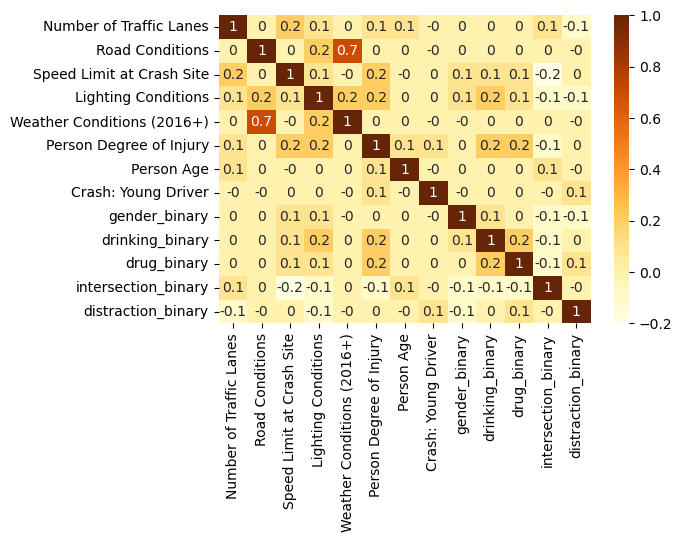

In [40]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_select.select_dtypes(include=[np.number]).corr().round(1), cmap='YlOrBr', annot=True)
plt.savefig('./figure/corr.png',bbox_inches='tight')

#### 3.2 Statsmodels

In [41]:
df_select.rename(columns={"Number of Traffic Lanes":"lane_num",
                  "Road Conditions":"road_condition",
                  "Speed Limit at Crash Site":"speed_limit",
                  "Lighting Conditions":"light",
                  "Weather Conditions (2016+)":"weather",
                  "Person Age":"age",
                  "Person Degree of Injury":"injury"},inplace=True)
df_select.head()

,lane_num,road_condition,speed_limit,light,weather,injury,age,Person Gender,Crash: Drinking,Crash: Drug Use,Crash: Intersection,Crash: Young Driver,Crash: Driver Distracted (2016+),gender_binary,drinking_binary,drug_binary,intersection_binary,distraction_binary
datetime,,,,,,,,,,,,,,,,,,
2019-01-02 16:00:00,-0.797016,1,-0.056022,0,1,1.0,-1.261658,Male,No Drinking Involved,No Drugs Involved,Non-Intersection Crash,0,No Driver Distraction,1,0,0,0,0
2019-01-02 20:00:00,-0.797016,1,-0.510255,1,1,1.0,-0.720724,Male,No Drinking Involved,No Drugs Involved,Intersection Crash,1,No Driver Distraction,1,0,0,1,0
NaT,-0.797016,0,-0.964488,0,0,0.0,-1.114131,Male,No Drinking Involved,No Drugs Involved,Intersection Crash,0,No Driver Distraction,1,0,0,1,0
2019-01-03 19:00:00,1.289345,0,1.760910,1,0,0.0,-0.425669,Male,No Drinking Involved,No Drugs Involved,Non-Intersection Crash,0,No Driver Distraction,1,0,0,0,0
2019-01-02 17:00:00,1.289345,1,-0.056022,1,1,1.0,-0.622373,Female,No Drinking Involved,No Drugs Involved,Intersection Crash,0,No Driver Distraction,0,0,0,1,0


In [42]:
df_select.injury.value_counts(normalize=True)

injury
0.0    0.724916
1.0    0.275084
Name: proportion, dtype: float64

In [43]:
import statsmodels.formula.api as smf

result = smf.logit(formula='injury ~ lane_num + weather + road_condition + speed_limit + \
                            light  + age + gender_binary + drinking_binary +\
                            drug_binary + intersection_binary + distraction_binary',
                   data=df_select).fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.525031
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 injury   No. Observations:                 6827
Model:                          Logit   Df Residuals:                     6815
Method:                           MLE   Df Model:                           11
Date:                Mon, 11 Dec 2023   Pseudo R-squ.:                  0.1075
Time:                        16:17:29   Log-Likelihood:                -3584.4
converged:                       True   LL-Null:                       -4016.0
Covariance Type:            nonrobust   LLR p-value:                5.041e-178
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.2590      0.065    -19.382      0.000      -1.386      -1.132
la

In [44]:
print("weather, road_surface, gender_binary noted as non-significant")

weather, road_surface, gender_binary noted as non-significant


In [45]:
result = smf.logit(formula='injury ~ lane_num + speed_limit + \
                            light  + age + drinking_binary +\
                            drug_binary + intersection_binary + distraction_binary',
                   data=df_select).fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.525249
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 injury   No. Observations:                 6827
Model:                          Logit   Df Residuals:                     6818
Method:                           MLE   Df Model:                            8
Date:                Mon, 11 Dec 2023   Pseudo R-squ.:                  0.1071
Time:                        16:17:29   Log-Likelihood:                -3585.9
converged:                       True   LL-Null:                       -4016.0
Covariance Type:            nonrobust   LLR p-value:                2.145e-180
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.2960      0.052    -25.020      0.000      -1.397      -1.194
la

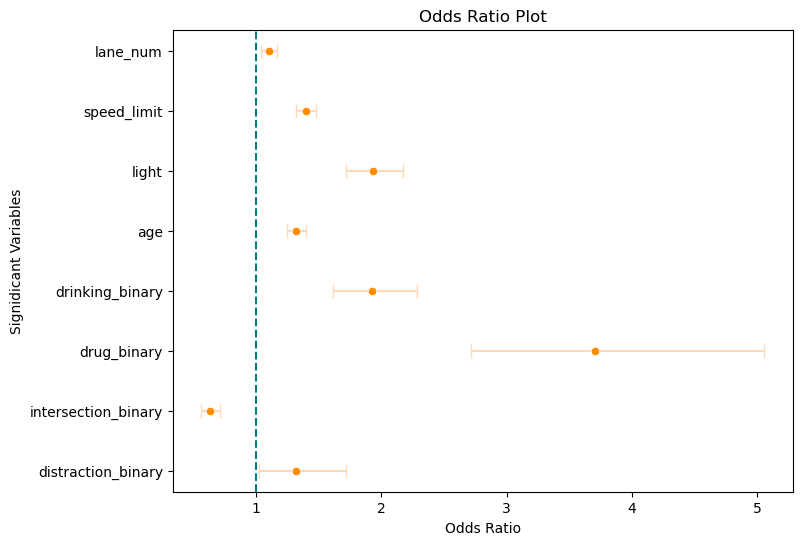

In [46]:
# Calculate odds ratios and confidence intervals
odds_ratios = np.exp(result.params)
conf_int = np.exp(result.conf_int())

# Create a DataFrame for odds ratios and confidence intervals
odds_ratio_df = pd.DataFrame({'Odds Ratio': odds_ratios, 'CI Lower': conf_int[0], 'CI Upper': conf_int[1]}).drop(index='Intercept')

# Plot the odds ratio with confidence intervals
plt.figure(figsize=(8, 6))

plt.errorbar(y=odds_ratio_df.index, x=odds_ratio_df['Odds Ratio'], 
             xerr=[odds_ratio_df['Odds Ratio'] - odds_ratio_df['CI Lower'], 
                   odds_ratio_df['CI Upper'] - odds_ratio_df['Odds Ratio']],
             fmt='o', color='peachpuff', capsize=5, markersize=2)
sns.scatterplot(y=odds_ratio_df.index, x='Odds Ratio', data=odds_ratio_df, zorder=5,color='darkorange')
plt.axvline(x=1, color='teal', linestyle='--', label='Reference Line at x=1')
plt.title('Odds Ratio Plot')
plt.xlabel('Odds Ratio')
plt.ylabel('Signidicant Variables')
plt.show()

In [47]:
odds_ratio_df

,Odds Ratio,CI Lower,CI Upper
lane_num,1.104720,1.042847,1.170263
speed_limit,1.394435,1.314875,1.478810
light,1.933101,1.717809,2.175375
age,1.317142,1.242615,1.396138
drinking_binary,1.922365,1.615800,2.287094
drug_binary,3.705766,2.715459,5.057231
intersection_binary,0.631427,0.558891,0.713376
distraction_binary,1.322027,1.019364,1.714556


#### 3.3 Sklearn + SMOTE

In [48]:
X = df_select.drop(columns=['injury','Person Gender',\
                            'Crash: Drinking','Crash: Drug Use',\
                            'Crash: Intersection', 'Crash: Young Driver',\
                            'Crash: Driver Distracted (2016+)',\
                            'weather','road_condition','gender_binary'], axis=1)
y = df_select['injury']

In [49]:
# 1. Stratified Cross Validation (without SMOTE)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

clf = LogisticRegression(max_iter=2000)

scores_acc = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
scores_f1 = cross_val_score(clf, X, y, cv=cv, scoring='f1')

print("Cross-validated Accuracy:", round(scores_acc.mean(), 2))
print("Cross-validated F1 score:", round(scores_f1.mean(), 2))

Cross-validated Accuracy: 0.75
Cross-validated F1 score: 0.34


In [50]:
# 2. Stratified Cross Validation with SMOTE

clf = LogisticRegression(max_iter=2000)

smote = SMOTE(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy = []
f1 = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Train the classifier on the resampled data
    clf.fit(X_train_resampled, y_train_resampled)

    y_pred = clf.predict(X_test)

    accuracy.append(accuracy_score(y_test, y_pred))
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    
    f1.append(f1_score(y_test, y_pred))
    #print("f1", f1_score(y_test, y_pred))
    
print("Mean accuracy:", round(np.array(accuracy).mean(), 2))
print("Mean F1 score:", round(np.array(f1).mean(), 2))

Mean accuracy: 0.68
Mean F1 score: 0.52


#### 4. ROC Curve

In [51]:
# 3. Training Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=123)

clf = LogisticRegression(max_iter=2000)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,-1]

In [52]:
cm = metrics.confusion_matrix(y_test, y_pred) #true value first, then predicted value

df_cm = pd.DataFrame(data=cm, 
                     columns=['predict: no/minor/possible (0)', 'predict: serious/fatal (1)'],
                     index=['true: no/minor/possible (0)', 'true: serious/fatal (1)']
                    )

df_cm

,predict: no/minor/possible (0),predict: serious/fatal (1)
true: no/minor/possible (0),948,40
true: serious/fatal (1),294,84


In [53]:
tp = cm[1,1]
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]

ps = precision_score(y_test, y_pred)
print("Precision:", round(ps,2))
recall_sc = recall_score(y_test, y_pred)
print("Recall:", round(recall_sc,2))
false_alarm_rate = fp / (fp + tn)
print("False alarm rate:", round(false_alarm_rate,2))
specificity = 1 - false_alarm_rate
print("Specificity:", round(specificity,2))
print("F1:", round(f1_score(y_test, y_pred),2))
print("Accuracy:", round(accuracy_score(y_test, y_pred),2))

Precision: 0.68
Recall: 0.22
False alarm rate: 0.04
Specificity: 0.96
F1: 0.33
Accuracy: 0.76


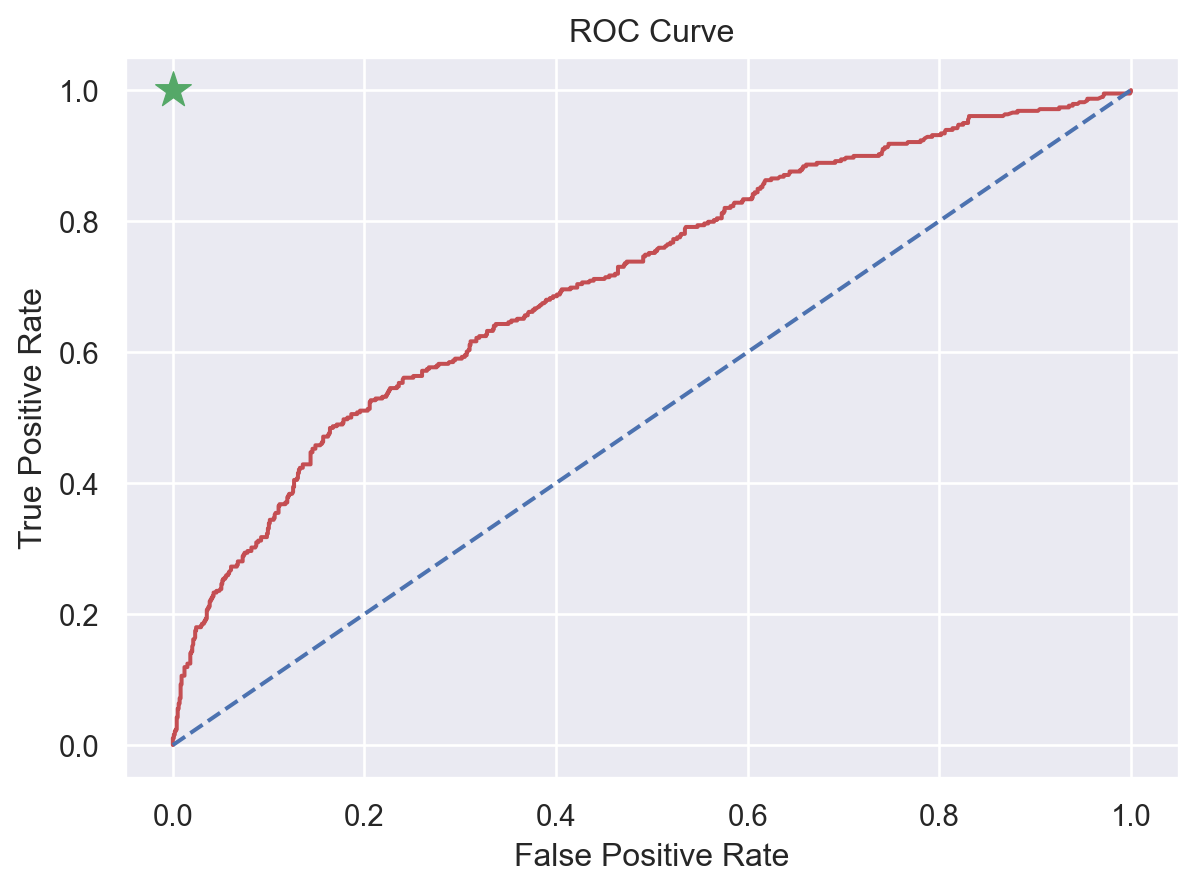

In [54]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba)

roc_df = pd.DataFrame({"fpr":fpr, "tpr":tpr, 'threshold':threshold})

roc_df

(
    so.Plot(roc_df, x='fpr', y='tpr')
    .add(so.Line(color='r'))
    .add(so.Line(linestyle='dashed'), data=pd.DataFrame({'x':[0,1], 'y':[0,1]}), x='x', y='y')
    .add(so.Dot(color='g', pointsize=14, marker='*'), data=pd.DataFrame({'x':[0], 'y':[1]}), x='x', y='y', )
    .label(x='False Positive Rate', 
           y='True Positive Rate',
           title='ROC Curve')
)